## **Contents**

0. Initial Setup
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing and Transformation
4. Exploratory Data Analysis
6. Inferential Statistic
7. Conclusion
8. Recommendation

___

## **Initial Setup**

Import libraries untuk eksplorasi data dan analisis

In [1]:
import numpy as np          # Numerical operations and array manipulation
import pandas as pd         # Data manipulation and analysis (DataFrames)
import matplotlib.pyplot as plt  # Basic plotting and visualization
import seaborn as sns       # Statistical data visualization
from scipy.stats import shapiro  # Normality test (Shapiro-Wilk test)
from pandas.core.reshape.pivot import pivot_table  # Data pivoting
import plotly.express as px  # Interactive plots and visualizations
from scipy.stats import chi2_contingency  # Chi-square test of independence
from scipy.stats import pearsonr  # Pearson correlation coefficient

import folium                # Mapping and geospatial data visualization
# statistics
import statsmodels.api as sm # Statistical models and tests
import scipy.stats as stats  # Statistical functions and tests

---

## __1. Business Problem Understanding__ 
---
### **Transaksi Transportasi Publik Transjakarta**
__Latar Belakang__

Transjakarta adalah moda transportasi massal yang mendukung aktivitas di Ibu Kota Jakarta. Transjakarta memiliki sistem *Bus Rapid Transit* (BRT), yang artinya bus angkutan cepat.

Transjakarta memiliki lintasan sejauh 230,9 km dan memiliki 252 halte yang tersebar dalam 14 koridor (rute utama). Kini Transjakarta beropresi selama 24 jam di seluruh koridornya.

__Pernyataan Masalah__

PT Transportasi Jakarta ingin memperoleh informasi mengenai aktivitas Transjakarta pada April 2024 untuk mengukur minat dan pola penggunaan Transjakarta di masyarakat.

`Fokus Analiss`
1. Demografi pelanggan Transjakarta selama April 2023
2. Pola dan preferensi pelanggan
3. Aktivitas sistem transportasi seperti, koridor dan halte: efektifitas dan efisiensi sistem

## __2. Data Understanding__ 
---

Pada bagian ini, kita akan mencoba memahami data berdasarkan tipe data dan informasi dari setiap kolom.

In [2]:
# load data
df = pd.read_csv('Transjakarta.csv')
display(df.head(2),df.tail(2))

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


Dataset Transjakarta.csv, memiliki 22 kolom. Berikut penjelasan unutk setiap kolomnya.

### __2.1 Keterangan Kolom__

|No| Nama Kolom | Keterangan |
|--|------------|------------|
|1| transID | id transaksi yang unik untuk setiap transaksi | 
|2| payCardID | Pengidentifikasi utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar|
|3| payCardBank| Nama penerbit bank kartu pelanggan| 
|4| payCardName| Nama yang terdaftar di kartu|
|5| payCardSex| Jenis kelamin pelanggan yang terdaftar di kartu|
|6| payCardBirthDate| Tanggal lahir pelanggan|
|7| corridorID | ID koridor/rute ID sebagai kunci pengelompokkan rute| 
|8| corridorName| nama koridor/nama rute berisi Awal dan Selesai untuk setiap rute | 
|9| direction| 0 untuk pergi, 1 untuk kembali. Arah rute| 
|10| tapInStops| *Tap In* (entrance) Stops ID untuk mengidentifikasi nama perhentian|
|11| tapInStopsName| *Tap In* (entrance) nama perhentian tempat pelanggan *tap in*.
|12| tapInStopsLat| Garis Lintang Tap In Stop|
|13| tapInStopsLon| Bujur Tap In Stop|
|14| stopStartSeq| Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dll. Terkait dengan arah.|
|15| tapInTime| Waktu *tap in*. Tanggal dan waktu. 
|16| tapOutStops| *Tap Out* (*Exit*) Stops ID untuk mengidentifikasi nama perhentian|
|17| tapOutStopsName| *Tap out* (*Exit*) nama perhentian tempat pelanggan *tap out*|
|18| tapOutStopsLat| Garis Lintang Perhentian *Tap Out*|
|19| tapOutStopsLon| Garis Bujur dari *Tap Out Stop*|
|20| stopEndSeq| Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dll. Terkait dengan arah|
|21| tapOutTime| Waktu keluar. Tanggal dan waktu|
|22| payAmount| umlah yang dibayar pelanggan. Beberapa gratis. Beberapa tidak.

### __2.2 Duplikat, Missing Value, dan Tipe Data__

Mari memeriksa jumlah bari dan kolom, dan kelengkapan data pada data set ini.

In [3]:
# jumlah data tiap kolom  dan dtype
print(f'Jumlah baris dan kolom dalam dataset df adalah {df.shape}\n')
df.info()
print(f'\nJumlah baris yang memiliki duplikat adalah {df.duplicated().sum()} baris')

Jumlah baris dan kolom dalam dataset df adalah (37900, 22)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non

__Rangkuman__
- Tidak ada duplikasi data.
- Terdapat _missing value_ pada beberapa kolom yang akan ditangani pada bagian selanjutnya.
- Terdapat kolom-kolom yang perlu diubah tipe datanya: `payCardID`, `payCardBirthDate`, `tapInTime` dan `tapOutTime`. Perubahan ini akan ditangani pada bagian selanjutnya.

### __2.3 Unique Values__

In [4]:
# Data unik setiap kolom
unique_items =[]
for i in df.columns:
    unique_items.append(
        [i, df[i].nunique(), df[i].unique()])

desc_col = pd.DataFrame(
    columns= ['kolom', 'jumlahUnik', 'sampleUnik'],
    data= unique_items
)

display(desc_col)

,kolom,jumlahUnik,sampleUnik
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


__Rangkuman__
- Kolom 'transID' merupakan kode unik yang menunjukkan transaksi yang berbeda-beda.
- Kolom `payCardID` merupakan kode unik yang menunjukkan perbedaan pelanggan
- 'corridorID' dan `corridorName` merupakan kolom yang memberikan informasi secara berpasangan
- 'tapInStops' dan `tapInStopsName` merupakan kolom yang memberikan informasi secara berpasangan
- 'tapOutStops' dan `tapOutStopsName` merupakan kolom yang memberikan informasi secara berpasangan

`variabel payCardID dan payCardName`

Dari penjabaran di atas ditemukan bahwa beberapa pelanggan memiliki lebih dari 1 Card ID. Data dulikat seperti ini akan dibiarkan karena dapat dialami. Selain itu, informasi ini menunjukkan bahwa terdapat ada beberapa pelanggan yang memiliki nama yang sama.

In [5]:
df_cust = df.pivot_table(
    index = 'payCardName',
    values= 'payCardID',
    aggfunc= 'nunique'
)
df_cust[df_cust['payCardID']>1]

,payCardID
payCardName,
Ade Halimah,2
Cengkal Lestari,2
Fathonah Saefullah,2
Leo Wastuti,2
Rahayu Prabowo,2
Suci Hutagalung,2
Suci Wacana,2


`variabel corridorID dan corridorName`

Dari penjabaran di atas ditemukan bahwa corridorID, memiliki jumlah nilai unik lebih banyak daripada corridorName, padahal keduanya seharusnya saling berpasangan. Oleh karena itu, saya memeriksa lebih lanjut.

In [6]:
# Memeriksa Koridor name yang memiliki lebih dari 1 ID
df_corrname = df.pivot_table(
    index='corridorName',
    values= 'corridorID',
    aggfunc= 'nunique'
)
df_corrname[df_corrname['corridorID']>1]

,corridorID
corridorName,
Blok M - Kota,2
Kalideres - Bundaran HI via Veteran,2
Matraman Baru - Ancol,2
Pinang Ranti - Pluit,2
Pulo Gadung - Monas,2


In [7]:
# Nama koridor dan ID yang lebih dari 1
df.groupby('corridorName')['corridorID'].unique().loc[['Blok M - Kota', 'Kalideres - Bundaran HI via Veteran',
       'Matraman Baru - Ancol', 'Pinang Ranti - Pluit', 'Pulo Gadung - Monas']]

corridorName
Blok M - Kota                               [M1, 1]
Kalideres - Bundaran HI via Veteran    [M3, 3, nan]
Matraman Baru - Ancol                  [5, nan, M5]
Pinang Ranti - Pluit                   [M9, 9, nan]
Pulo Gadung - Monas                    [2, M2, nan]
Name: corridorID, dtype: object

Berdasarkan liputan dari [Kompas.com](https://travel.kompas.com/read/2022/09/12/130400427/transjakarta-beroperasi-24-jam-di-13-koridor-ini-daftarnya), ditemukan bahwa perbedaan ID menunjukkan jam operasional
- ID yang diawali dengan huruf 'M' menunjukkan koridor yang beroperasi 24 jam
- ID yang tidak diawali dengan huruf 'M' beroperasi dari pk 05.00 - 22.00 

`Variabel tapInStops dan tapInStopsName`

Dari penjabaran di atas ditemukan bahwa tapInStops, memiliki jumlah nilai unik lebih sedikit daripada tapInStopsName, padahal keduanya seharusnya saling berpasangan. Oleh karena itu, saya memeriksa lebih lanjut.

In [8]:
# Memeriksa tapInStopsName yang memiliki lebih dari 1 tapInStops
df_instops = df.pivot_table(
    index='tapInStopsName',
    values= 'tapInStops',
    aggfunc= 'nunique'
)
df_instops[df_instops['tapInStops']>1]

,tapInStops
tapInStopsName,
Dukuh Atas 2,2


Perhentian Dukuh Atas 2 memiliki 2 ID, hal ini perlu diperiksa lebih lanjut, apakah ini merupakan hal umum atau tidak

In [9]:
# tapInStopsName yang memiliki lebih dari 1 tapInStops
df.groupby('tapInStopsName')['tapInStops'].unique().loc['Dukuh Atas 2']

array(['P00052', 'P00298'], dtype=object)

In [10]:
# Memeriksa jumlah baris yang memiliki tapInStops untuk Dukuh Atas 2 yang berbeda
print(f"Jumlah baris yang memiliki tapInStops P00298: {len(df[df['tapInStops']=='P00298'])}")
print(f"Jumlah baris yang memiliki tapInStops P00052: {len(df[df['tapInStops']=='P00052'])}")

Jumlah baris yang memiliki tapInStops P00298: 1
Jumlah baris yang memiliki tapInStops P00052: 20


In [11]:
# Memeriksa tapInStops yang memiliki lebih dari 1 tapInStopsName
df_instops = df.pivot_table(
    index= 'tapInStops',
    values='tapInStopsName',
    aggfunc= 'nunique'
)
df_instops[df_instops['tapInStopsName']>1]

,tapInStopsName
tapInStops,


__Rangkuman__
- Tidak terdapat `tapInStops` yang memiliki `tapInStopsName` yang lebih dari satu, artinya, kurangnya data pada `tapInStops` terjadi karena nilai null pada `tapInStops` sehingga ada beberapa `tapInStopsName` yang tidak memiliki ID.
- Selain itu, ditemukan nama perhentian Dukuh Atas 2, memiliki 2 tapInStops ID.	

`Variabel tapOutStops dan tapOutStopsName`

Dari tabel di atas ditemukan bahwa tapOutStops, memiliki jumlah nilai unik lebih sedikit daripada tapOutStopsName, padahal keduanya seharusnya saling berpasangan. Oleh karena itu, saya memeriksa lebih lanjut.

In [12]:
# Memeriksa tapInStopsName yang memiliki lebih dari 1 tapoutStops
df_outstops = df.pivot_table(
    index='tapOutStopsName',
    values= 'tapOutStops',
    aggfunc= 'nunique'
)
df_outstops[df_outstops['tapOutStops']>1]

,tapOutStops
tapOutStopsName,
Dukuh Atas 2,2


In [13]:
# tapOutStopsName yang memiliki lebih dari 1 tapOutStops
df.groupby('tapInStopsName')['tapInStops'].unique().loc['Dukuh Atas 2']

array(['P00052', 'P00298'], dtype=object)

Mari memeriksa apakah perbedaan ini merupakan hal umum atau tidak.

In [14]:
# Memeriksa jumlah baris yang memiliki tapOutStops untuk Dukuh Atas 2 yang berbeda
print(f"Jumlah baris yang memiliki tapInStops P00298: {len(df[df['tapOutStops']=='P00298'])}")
print(f"Jumlah baris yang memiliki tapInStops P00052: {len(df[df['tapOutStops']=='P00052'])}")

Jumlah baris yang memiliki tapInStops P00298: 20
Jumlah baris yang memiliki tapInStops P00052: 28


In [15]:
# Memeriksa tapInStopsName yang memiliki lebih dari 1 tapOutStops
df_outstops = df.pivot_table(
    index = 'tapOutStops',
    values= 'tapOutStopsName',
    aggfunc= 'nunique'
)
df_outstops[df_outstops['tapOutStopsName']>1]

,tapOutStopsName
tapOutStops,


__Rangkuman__
- `tapInStops` tidak memiliki `tapOutStopsName` yang lebih dari satu, artinya, kurangnya data pada tapInStops terjadi karena nilai null pada `tapOutStops` sehingga ada beberapa `tapOutStopsName` yang tidak memiliki ID.
- Selain itu, sama seperti bagian sebelumnya, ditemukan nama perhentian Dukuh Atas 2, memiliki 2 tapOutStops ID. Ini merupakan perbedaan berulang sehingga dianggap sebagai sesuatu yang umum (bukan error)	

### __2.4 Identifikasi Missing Values__

Pada bagian 2.2, ditemukan bahwa terdapat _missing values_ pada dataset ini, oleh karena itu, mari melihat lebih dalam bagaimana karakteristik data yang hilang.

In [16]:
# jumlah nilai null setiap kolom
namaKolom = []
jumlahNull = []
persen = []
for i in df.columns:
    null = df[i].isna().sum()
    if null > 0:
        namaKolom.append(i)
        jumlahNull.append(null)
        persen.append(round(null/len(df[i])*100, 2))

dfNull = pd.DataFrame(data=zip(namaKolom, jumlahNull, persen), columns=['kolom', 'jumlahNull', 'persentaseNull(%)'])
display(dfNull)

,kolom,jumlahNull,persentaseNull(%)
0,corridorID,1257,3.32
1,corridorName,1930,5.09
2,tapInStops,1213,3.20
3,tapOutStops,2289,6.04
4,tapOutStopsName,1344,3.55
5,tapOutStopsLat,1344,3.55
6,tapOutStopsLon,1344,3.55
7,stopEndSeq,1344,3.55
8,tapOutTime,1344,3.55
9,payAmount,1007,2.66


In [17]:
# Jumlah total data null dari seluruh kolom
print(f"Jumlah baris dengan setidaknya satu nilai null: {df.isnull().any(axis=1).sum()}\nPersentase baris yang memiliki null {round(df.isnull().any(axis=1).sum()/len(df)*100,2)}%")

Jumlah baris dengan setidaknya satu nilai null: 6170
Persentase baris yang memiliki null 16.28%


__Rangkuman__
- _Missing values_ ditemukan pada 10 kolom dalam dataset.
- Setelah dikalkulasi, terdapat `16.28%` baris yang memiliki _missing values_ sehingga hal ini perlu ditangani.

### __2.5 Deskripsi Statistik__

Memeriksa hasil deskripsi statistik untuk menemukan informasi seperti, nilai minimal, maksimum, dan tendensi sentral.

In [18]:
print('Deskripsi Data Numerikal')
display(df.describe())
print('Deskripsi Data Kategorikal')
display(df.describe(include='object'))

Deskripsi Data Numerikal


,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


Deskripsi Data Kategorikal


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


`Insight`
- Dataset ini merupakan historis transaksi Transjakarta pada 1 April - 30 April 2023.
- Terdapat 37900 baris data dan 22 kolom.
- Tidak ada data duplikat.
- Terdapat baris yang memiliki minimal 1 *missing value* sebesar 16.28% dari total baris data.
- *Missing Values* ditemukan pada 10 kolom ('corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName', 'tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime', 'payAmount').
- Terdapat tipe data datetime: tapInTime, tapOutTime
- Terdapat tipe data float: `direction`, `tapInStopsLat`, `tapInStopsLan`, `tapOutStopsLat` `tapOutStopsLan`, `payAmount`         
- Data numerik lainnya: `payCardBirthDate`, `stopStartSeq`, `stopEndSeq`
- Sisanya merupakan data kategorikal.                      


## __3. Data Preprocessing and Transformation__
---

### __3.1 Ubah Tipe Data__
Berdasarkan tahap _data understanding_ sebelumnya perlu dilakukan `pengubahan tipe data` sebagai berikut:

Type data variabel
- `payCardID` diubah dari __integer__ menjadi __object__ (kategorikal)
- `payCardBirthDate` diubah dari __object__ menjadi __integer dt.year__ (integer, Year)
- `tapInTime` dan `tapOutTime` dari __object__ menjadi __datetime64[ns]__ (time series, '%Y-%m-%d %H:%M:%S')

In [19]:
# mengubah format payCardID dari int menjadi obj
df['payCardID'] = df['payCardID'].astype(str)

# mengubah format payCardBirthDate dari object menjadi datetime
df['payCardBirthDate'] = pd.to_datetime(df['payCardBirthDate'], format='%Y').dt.year

# mengubah format tapInTime dan tapOutTime dari object menjadi datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'], format='%Y-%m-%d %H:%M:%S')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], format='%Y-%m-%d %H:%M:%S')

In [20]:
# Tipe data setelah diubah
for i in ['payCardID', 'payCardBirthDate', 'tapInTime', 'tapOutTime']:
    print(f"Tipe data {i}: {df[i].dtype}")

Tipe data payCardID: object
Tipe data payCardBirthDate: int32
Tipe data tapInTime: datetime64[ns]
Tipe data tapOutTime: datetime64[ns]


Kini tipe data yang tidak sesuai sudah diubah.

### **3.2 Imputasi Missing Value**

Berikut penjelasan mengenai data null yang akan ditangani
- 'corridorID' memberikan informasi untuk mengisi 'corridorName', begitu pula sebaliknya.
- 'tapInStopsName' memberikan informasi ID untuk mengisi 'tapInStop', 
- 'tapOutStop' memberikan informasi ID untuk mengisi 'tapOutStopsName', begitu pula sebaliknya.
- 'tapOutStopsLat' dan 'tapOutStopsLon' merupakan data yang harus berpasangan dan saling bergantung agar memberikan informasi yang akurat
- 'stopEndSeq' merupakan urutan perhentian tempat pelanggan keluar dari moda trasportasi. 
- 'tapOutTime' adalah informasi waktu 'tap out' pelanggan.
- 'payAmount' tarif yang dikeluarkan setiap perjalanan.

#### __3.1.1 Kolom `corridorID` dan `corridorName`__

Pertama, saya mengambil sample untuk memeriksa _missing values_ pada corridorID dan corridorName yang akan diisi dengan mapping. Melalui mapping, pengisian _missing values_ dapat disesuaikan dengan nilai kolom yang sudah terdefinisi.

In [21]:
df[(df['corridorID'].isnull()) & (df['corridorName'].notnull())][['corridorID','corridorName']].sample(4, random_state = 42)

,corridorID,corridorName
17780,NaN,Roxy - Benhil
24365,NaN,Stasiun Tebet - Rusun Karet Tengsin
5730,NaN,Pasar Minggu - Jagakarsa
8914,NaN,Pulo Gebang - Rorotan


In [22]:
df[(df['corridorID'].notnull()) & (df['corridorName'].isnull())][['corridorID','corridorName']].sample(4, random_state = 51)

,corridorID,corridorName
3853,JAK.16,NaN
26457,M12,NaN
23153,JAK.59,NaN
13416,JAK.58,NaN


Berdasarkan sample di atas, terdapat data corridorID yang _missing_ namun corridorName terisi, begitu pula sebaliknya. Dari informasi yang ada, mari mencoba mengisi data yang memiliki informasi seperti ini, terlebih dahulu.

__Mengisi _missing values_ pada Kolom corridorName__

1.  Membuat fungsi
2. Menentukan map
3. Mengisi nilai null melalui mapping

In [23]:
# Mapping untuk mengisi Name yang kosong
df_namenotnull = df[df['corridorName'].notnull()]
corr_id = list(df_namenotnull['corridorID'])
corr_name = list(df_namenotnull['corridorName'])

mapping_name = dict(zip(corr_id,corr_name))         #membuat kategori mapping 

In [24]:
# Fungsi untuk mengisi nilai null
def fill_null(row, mapping, value, key):
    if pd.isnull(row[value]) and pd.notnull(row[key]):
        return mapping.get(row[key], np.nan)  # Mengisi dengan nilai dari dictionary jika ada
    return row[value]  # Tidak mengubah jika sudah ada nilai

# Mengisi nilai null di kolom 'corridorName' menggunakan fungsi
df['corridorName'] = df.apply(lambda row: fill_null(row, mapping_name, value='corridorName', key='corridorID'), axis=1)

In [25]:
# memeriksa hasil fillna
df.iloc[[3853, 26457, 23153, 13416]][['corridorID','corridorName']]

,corridorID,corridorName
3853,JAK.16,Cililitan - Condet
26457,M12,Sunter Boulevard Barat - Penjaringan
23153,JAK.59,Rawamangun - Tanah Merah
13416,JAK.58,Cilincing - Rorotan


In [26]:
df['corridorName'].isnull().sum()

1125

Kini _missing values_ pada kolom corridorName sudah terisi, walaupun masih ada yang tersisa 1125 baris yang _missing_.

__Mengisi Nilai Null pada Kolom corridorID__

Sebelumnya ditemukan bahwa koridor 'Blok M - Kota', 'Kalideres - Bundaran HI via Veteran', 'Matraman Baru - Ancol', 'Pinang Ranti - Pluit', 'Pulo Gadung - Monas' memiliki masing-maisng 2 ID yang maknanya berbeda sesuai dengan jam operasionalnya. Oleh karena itu, untuk mengisi kolom ID berdasarkan 'corridorname', saya perlu memeriksa waktu tap in dan top out pelanggan.

In [27]:
null_id =[]
# Loop melalui setiap key dan simpan hasil filter di list
remove_keys = [ 'Blok M - Kota', 'Kalideres - Bundaran HI via Veteran', 'Matraman Baru - Ancol', 'Pinang Ranti - Pluit', 'Pulo Gadung - Monas']
for key in remove_keys:
    filtered_df = df[(df['corridorName'] == key) & (df['corridorID'].isnull())]
    null_id.append(filtered_df)

# Gabungkan semua hasil filter menjadi satu DataFrame
result_df = pd.concat(null_id)

# Tampilkan hasil akhir
result_df[['corridorID', 'corridorName', 'tapInTime', 'tapOutTime']]

,corridorID,corridorName,tapInTime,tapOutTime
26521,NaN,Kalideres - Bundaran HI via Veteran,2023-04-21 19:20:37,2023-04-21 20:28:49
11100,NaN,Matraman Baru - Ancol,2023-04-27 16:21:42,2023-04-27 17:28:27
27310,NaN,Matraman Baru - Ancol,2023-04-24 06:19:17,2023-04-24 08:02:07
36927,NaN,Pinang Ranti - Pluit,2023-04-18 09:06:13,2023-04-18 10:39:31
20231,NaN,Pulo Gadung - Monas,2023-04-13 07:13:13,2023-04-13 08:25:36
25060,NaN,Pulo Gadung - Monas,2023-04-20 07:09:59,NaT
27933,NaN,Pulo Gadung - Monas,2023-04-24 21:01:38,2023-04-24 21:54:21
28433,NaN,Pulo Gadung - Monas,2023-04-25 07:12:44,2023-04-25 07:44:34


Informasi di atas menunjukkan bahwa 'tapInTime' dan 'tapOutTime' pada baris yang memiliki _missing_ 'corridorID' merupakan waktu dengan jam operasional pk 05.00 - pk 22.00. Artinya, ID tidak memiliki huruf 'M' di depannya.

In [28]:
result_df['corridorName'].unique()

array(['Kalideres - Bundaran HI via Veteran', 'Matraman Baru - Ancol',
       'Pinang Ranti - Pluit', 'Pulo Gadung - Monas'], dtype=object)

In [29]:
# Mapping untuk mengisi ID yang kosong
df_idnotnull = df[df['corridorID'].notnull()]
corr_id2 = list(df_idnotnull['corridorID'])
corr_name2 = list(df_idnotnull['corridorName'])
mapping_id = dict(zip(corr_name2,corr_id2))         #membuat kategori mapping

# mengganti value yang memiliki 2 ID
keys = ['Kalideres - Bundaran HI via Veteran', 'Matraman Baru - Ancol',
       'Pinang Ranti - Pluit', 'Pulo Gadung - Monas']
values = ['3', '5', '9', '2']
for keys, values in zip(keys, values):
    mapping_id[keys] = values

In [30]:
# Mengisi nilai null di kolom 'corridorID' menggunakan fungsi
df['corridorID'] = df.apply(lambda row: fill_null(row, mapping_id, value='corridorID', key='corridorName'), axis=1)

In [31]:
# memeriksa hasil fillna
df.iloc[[17780, 24365, 5730, 8914]][['corridorID','corridorName']]

,corridorID,corridorName
17780,JAK.08,Roxy - Benhil
24365,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin
5730,JAK.46,Pasar Minggu - Jagakarsa
8914,JAK.27,Pulo Gebang - Rorotan


__Memeriksa Hasil Missing Values corridorID dan corridorName__

In [32]:
# memeriksa sisa data null pada kolom corridorID
print(f"sisa data null pada kolom corridorID: {df['corridorID'].isnull().sum()}")
# memeriksa sisa data null pada kolom corridorName
print(f"sisa data null pada kolom corridorName: {df['corridorName'].isnull().sum()}")

sisa data null pada kolom corridorID: 1125
sisa data null pada kolom corridorName: 1125


In [33]:
print(f"Jumlah baris yang memiliki nilai null pada 'corridorID' dan 'corridorName': {len(df[(df['corridorID'].isnull()) & (df['corridorName'].isnull())])} baris")

Jumlah baris yang memiliki nilai null pada 'corridorID' dan 'corridorName': 1125 baris


Artinya, 1125 baris kosong di kolom 'corridorID' dan 'corridorName' tidak dapat diisi karena tidak ada informasi yang berkaitan, yang dapat membantu. 

#### __3.1.2 Kolom tapInStops__

Pada bagian _data understanding_ ditemukan bahwa 'tapInStopsName' Dukuh Atas 2 memiliki dua ID pada 'tapInStops'. Maka sebelum mengisi 'tapInStops' saya memeriksa terlebih jika ada baris Dukuh Atas 2 yang memiliki 'tapInStops' null.

In [34]:
print(f"jumlah 'tapInStopsName' Dukuh Atas 2 yang memiliki 'tapInStops' null: {len(df[(df['tapInStops'].isnull()) & (df['tapInStopsName'] =='Dukuh Atas 2')])}")

jumlah 'tapInStopsName' Dukuh Atas 2 yang memiliki 'tapInStops' null: 0


Selanjutnya, saya mengambil sample untuk memeriksa nilai null pada  tapInStops yang akan diisi dengan mapping sesuai dengan yang telah dilakukan sebelumnya.

In [35]:
df[(df['tapInStops'].isnull()) & (df['tapInStopsName'].notnull())][['tapInStops','tapInStopsName']].sample(4, random_state = 50)

,tapInStops,tapInStopsName
3016,NaN,JORR
20507,NaN,Matraman 1
23616,NaN,Explorer Tanah Abang
32873,NaN,Gg. Sawo 1


Mari membuat map untuk mengisi nilai _missing_.

In [36]:
# Mapping untuk mengisi 'tapInStops' yang kosong
df_instopnull = df[df['tapInStops'].notnull()]
in_id = list(df_instopnull['tapInStops'])
in_name = list(df_instopnull['tapInStopsName'])
mapping_inid = dict(zip(in_name,in_id))         #membuat kategori mapping 

In [37]:
# Mengisi nilai null di kolom 'tapInStops' menggunakan fungsi
df['tapInStops'] = df.apply(lambda row: fill_null(row, mapping_inid, value='tapInStops', key='tapInStopsName'), axis=1)

In [38]:
# memeriksa hasil fillna
df.iloc[[3016, 20507, 23616, 32873]][['tapInStops','tapInStopsName']]

,tapInStops,tapInStopsName
3016,P00096,JORR
20507,P00134,Matraman 1
23616,P00056,Explorer Tanah Abang
32873,B00554P,Gg. Sawo 1


In [39]:
# memeriksa sisa data null pada kolom tapInStops
print(f"sisa data null pada kolom tapInStops: {df['tapInStops'].isnull().sum()}")

sisa data null pada kolom tapInStops: 34


_Missing values_ pada kolom tapInStops masih ditemukan sebanyak `34` baris, oleh karena itu, mari mencoba mengisi berdasarkan informasi yang ada pada kolom `tapOutStops` dan `tapOutStopsName`.

In [40]:
df[(df['tapInStops'].isnull())&(df['tapInStopsName'].notnull())]['tapInStopsName'].unique()

array(['PPKD Jaktim', 'Rusun Pulo Gebang', 'Bundaran Alam Sutera 1',
       'Graha Sindu Bpk Penabur', 'Rusun Rorotan 2', 'Jln. Pinang 1',
       'Fatmawati 1', 'Nifarro Park', 'Ponpes Baitul Quran Al Ikhwan 1',
       'Sbr. Jln. R. Anggun', 'Sbr. Jln. Rawabadung',
       'Term. Muara Angke 2', 'Pusdiklat Pajak Jln. Sakti IV',
       'Simpang Otista III Selatan', 'Green Lake City',
       'Sbr. STIE Rawamangun', 'Sbr. Klinik Yadika Petukangan',
       'Simpang Jln. Kramat Jaya 2', 'Cipinang', 'Sbr. SMAN 41',
       'Sisma Medikal', 'Klinik Sasana Husada', 'Sbr. Koko Semesta',
       'Jln. Veteran 2', 'Gg. Al Mawaddah Tengah', 'Kec. Pondok Gede',
       'Galur', 'Sbr. Ruko Taman Cemara', 'Sbr. Barito Park',
       'Sbr. Gg. Langgar Kelapa Dua', 'Cipinang Lontar Rusun Polri',
       'Menara Cardig', 'Kel. Balekambang'], dtype=object)

In [41]:
# Mapping untuk mengisi tapOutStops yang kosong
df_idnotnull = df[df['tapOutStops'].notnull()]
out_name = list(df_idnotnull['tapOutStopsName'])
out_id = list(df_idnotnull['tapOutStops'])

mapping_outid = dict(zip(out_name,out_id))         #membuat kategori mapping 

In [42]:
# Mengisi nilai null di kolom 'tapInStops' menggunakan fungsi mapping dari 'tapOutStops'
df['tapInStops'] = df.apply(lambda row: fill_null(row, mapping_outid, value='tapInStops', key='tapInStopsName'), axis=1)

In [43]:
# memeriksa sisa data null pada kolom tapInStops
print(f"sisa data null pada kolom tapInStops: {df['tapInStops'].isnull().sum()}")

sisa data null pada kolom tapInStops: 22


__Rangkuman__
- Terdapat baris data yang yang tidak memiliki keterangan sama sekali mengenai 'tapInStops' berdasarkan 'tapInStopsName'-nya, sehingga data pada kedua kolom itu tetap _missing_.
- Tersisa 22 _missing values_ pada tapInStops.

#### __3.1.3 Kolom tapOutStops dan tapOutStopsName__

Pada bagian _data understanding_ ditemukan bahwa 'tapOutStopsName' Dukuh Atas 2 memiliki dua ID pada 'tapOutStops'. Maka sebelum mengisi 'tapOutStops' saya memeriksa terlebih jika ada baris Dukuh Atas 2 yang memiliki 'tapOutStops' _missing values_.

In [44]:
print(f"jumlah 'tapInStopsName' Dukuh Atas 2 yang memiliki 'tapOutStops' null: {len(df[(df['tapOutStops'].isnull()) & (df['tapOutStopsName'] =='Dukuh Atas 2')])}")

jumlah 'tapInStopsName' Dukuh Atas 2 yang memiliki 'tapOutStops' null: 3


Dukuh Atas 2 yang memiliki _missing_ ID akan ikut dilengkapi dengan cara mapping seperti sebelumnya. ertama, saya mengambil sample untuk memeriksa _missing values_ pada tapOutStopsName

In [45]:
df[(df['tapOutStops'].isnull()) & (df['tapOutStopsName'].notnull())][['tapOutStops','tapOutStopsName']].sample(4, random_state = 42)

,tapOutStops,tapOutStopsName
34120,NaN,SMAN 28
12611,NaN,Gerbang Tol Brigif
11004,NaN,Ps. Muara Karang
1518,NaN,Pluit


__Mengisi Nilai Null pada Kolom tapOutStops__

In [46]:
# Mapping untuk mengisi tapOutStops yang kosong
df_idnotnull = df[df['tapOutStops'].notnull()]
out_name = list(df_idnotnull['tapOutStopsName'])
out_id = list(df_idnotnull['tapOutStops'])

mapping_outid = dict(zip(out_name,out_id))         #membuat kategori mapping 

In [47]:
# Mengisi nilai null di kolom 'tapOutStops' menggunakan fungsi
df['tapOutStops'] = df.apply(lambda row: fill_null(row, mapping_outid, value='tapOutStops', key='tapOutStopsName'), axis=1)

In [48]:
# memeriksa hasil fillna
df.iloc[[34120, 12611, 11004, 1518]][['tapOutStops','tapOutStopsName']]

,tapOutStops,tapOutStopsName
34120,NaN,SMAN 28
12611,B06644P,Gerbang Tol Brigif
11004,B02650P,Ps. Muara Karang
1518,P00181,Pluit


Kini sudah ada _missing values_ pada kolom tapOutStops yang terisi. Namun, ada baris yang tidak dapat diisi karena kurangnya infomasi dari data sebelumnya.

__Memeriksa Hasil Fillna__

In [49]:
# memeriksa sisa data null pada kolom tapOutStops
print(f"sisa data null pada kolom tapOutStops: {df['tapOutStops'].isnull().sum()}")

sisa data null pada kolom tapOutStops: 1363


Terdapat beberana nama perhentian 'Out' yang tercatat dalam perhentian 'In', sehingga dapat membantu mengisi informasi berkaitan dengan 'tapOutStops'.

In [50]:
df[(df['tapOutStops'].isnull())&(df['tapOutStopsName'].notna())][['tapOutStops','tapOutStopsName']]

,tapOutStops,tapOutStopsName
32068,NaN,Jln. H. Yahya
32419,NaN,Sbr. Jl H Emuntipala I
32570,NaN,Sbr. Ps. Pisang
32926,NaN,Exit Tol Veteran Bintaro
32960,NaN,MIN 8 Srengseng Sawah
33424,NaN,Masjid Al Waqof
33550,NaN,Sbr. Persada Purnawira Halim
33961,NaN,Grha Intirub
34084,NaN,Jln. Timbul III
34120,NaN,SMAN 28


In [51]:
# Mengisi nilai null di kolom 'tapOutStops' menggunakan fungsi dan mapping dari 'tapInStops'
df['tapOutStops'] = df.apply(lambda row: fill_null(row, mapping_inid, value='tapOutStops', key='tapOutStopsName'), axis=1)

In [52]:
# memeriksa hasil fillna
df.iloc[[32068, 32419, 32570, 32926]][['tapOutStops','tapOutStopsName']]

,tapOutStops,tapOutStopsName
32068,NaN,Jln. H. Yahya
32419,B03886P,Sbr. Jl H Emuntipala I
32570,B04168P,Sbr. Ps. Pisang
32926,B00345P,Exit Tol Veteran Bintaro


In [53]:
print(f"sisa data null pada kolom tapOutStops: {df['tapOutStops'].isnull().sum()}")

sisa data null pada kolom tapOutStops: 1353


_Missing value_ pada kolom tapOutStops, berkurang 10 baris dari proses sebelumnya.

#### __3.1.4 Kolom payAmount__

Sebelum mengisi nilai null pada payAmount saya memastikan bahwa beberapa koridor yang memiliki tarif yang sama. Namun saya perlu mastikan kembali untuk melihat bahwa dalam 2 koridor hanya memiliki 1 tarif saja.

In [54]:
# mengelompokkan koridor dengan tarif 0
payAmount_0 = df[df['payAmount']==0]['corridorID'].unique()
payAmount_0

array(['JAK.18', nan, 'JAK.46', 'JAK.88', 'JAK.16', 'JAK.02', '3B', 'BW9',
       'JAK.15', 'JAK.112', 'JAK.43B', 'JAK.42', 'JAK.36', 'JAK.06',
       'JAK.14', '3A', '3C', 'JAK.71', 'JAK.77', 'JAK.44', 'JAK.19',
       'JAK.75', 'JAK.52', 'JAK.37', 'JAK.31', '11M', 'JAK.43C', '2F',
       'JAK.117', 'JAK.49', 'JAK.20', 'JAK.118', 'JAK.27', '4E', 'JAK.13',
       'JAK.84', '2H', 'JAK.08', 'JAK.23', 'JAK.07', 'JAK.22', 'JAK.115',
       'JAK.21', 'JAK.26', 'JAK.64', 'JAK.47', '12C', 'JAK.01', 'JAK.120',
       'JAK.85', '11N', 'JAK.10', '2E', 'JAK.41', 'JAK.86', '9F', '11P',
       'JAK.73', 'JAK.32', 'JAK.50', 'JAK.29', 'JAK.45', 'JAK.110A',
       'JAK.51', 'JAK.54', 'JAK.03', 'JAK.25', 'JAK.39', 'JAK.80',
       'JAK.11', 'JAK.17', '11K', '10B', 'JAK.30', 'JAK.58', 'JAK.34',
       '10A', 'JAK.72', 'JAK.74', 'JAK.40', 'JAK.60', 'JAK.56', 'JAK.59',
       'JAK.113', 'JAK.04', '12F', 'JAK.61', 'JAK.24', '11C', 'JAK.35',
       'JAK.38', 'JAK.33', 'JAK.05', '11B', 'JAK.106', 'JAK.28', '

In [55]:
# mengelompokkan koridor dengan tarif 3500
payAmount_3500 = df[df['payAmount']==3500]['corridorID'].unique()
payAmount_3500

array(['5', '6C', 'R1A', '11D', '12', '1Q', '5M', '9A', '4', 'S22', '13',
       '9E', 'M9', 'T11', '6V', '11Q', '11', '1C', 'M1', '7E', '1P', '7D',
       '6H', '14', 'JIS3', '2', '6N', 'M11', '9N', '7P', '13B', 'M7',
       '12A', '9D', '1', 'M8', 'B21', 'M3', '8K', 'M10', '10D', 'B11',
       '8C', 'M2', '12B', '5D', '7A', '7Q', '1M', '5C', '6Q', '8E', nan,
       '6M', 'L13E', '12P', '1F', '13C', '4B', '7C', '2A', '8A', '1E',
       'M4', '9H', '13D', '5N', '6T', '5F', '3F', '2P', 'S21', 'M12',
       '1N', 'S11', '6U', '10', '2B', '10K', '6A', '4F', '6B', '5B', '3',
       'M6', '8', '6D', '1H', '4C', 'M13', '8D', '4D', '7', '9C', 'D21',
       'D11', '8M', '1B', '12H', '7F', '6', '10H', '3E', '9', '1A', '2Q',
       '1R', '7B', 'M5'], dtype=object)

In [56]:
# mengelompokkan koridor dengan tarif 20000
payAmount_20000 = df[df['payAmount']==20000]['corridorID'].unique()
payAmount_20000

array(['1T', 'B14', 'T21', 'D32', 'S31', nan, 'B13', 'D31', '1K', '6P',
       'S12'], dtype=object)

In [57]:
common_elements = set(payAmount_0) & set(payAmount_3500)
common_elements2 = set(payAmount_0) & set(payAmount_20000)
common_elements3 = set(payAmount_3500) & set(payAmount_20000)

print("Common elements payAmount_0 dan payAmount_3500:", common_elements)
print("Common elements payAmount_0 dan payAmount_20000:", common_elements2)
print("Common elements payAmount_3500 dan payAmount_20000:", common_elements3)

Common elements payAmount_0 dan payAmount_3500: {nan}
Common elements payAmount_0 dan payAmount_20000: {nan}
Common elements payAmount_3500 dan payAmount_20000: {nan}


Dari bukti di atas, tidak ada koridor yang masuk ke dalam lebih dari 1 kelompok tarif yang telah ditentukan, artinya setiap koridor memiliki tarif tertentu yang selalu sama. Berdasarkan pola yang ada di setiap kelompok tarif, berikut pengisian nilai null.

In [58]:
# Koridor tanpa keterangan tarif
df[(df['payAmount'].isna())&(df['corridorID'].notna())]['corridorID'].unique()

array(['M7B', 'JAK.48B', '3H', 'JAK.48A', 'M1H'], dtype=object)

In [59]:
# Mapping untuk mengisi payAmount yang kosong
mapping_pay = {'M7B':3500, 'JAK.48B':0, '3H':3500, 'JAK.48A':0, 'M1H':3500}

In [60]:
# Mengisi nilai null di kolom 'payAmount' menggunakan fungsi
df['payAmount'] = df.apply(lambda row: fill_null(row, mapping_pay, value='payAmount', key='corridorID'), axis=1)

In [61]:
print(f"sisa data null pada kolom payAmount: {df['payAmount'].isnull().sum()}")

sisa data null pada kolom payAmount: 28


28 baris lainnya pada kolom 'payAmount' tidak dapat dilengkapi karena kurangnya informasi pada kolom corridorID.

#### __3.1.5 Mengisi corridorID dan corridorName yang keduannya _Missing___

Pada dataset ini ditemukan bahwa setiap baris data memiliki informasi berkaitan dengan 'payCardID' yang merupakan nomor unik. Setiap nomor untuk menunjukkan keunikan aktivitas berkaitan dengan 'direction dan 'tapInStops'. Kekosongan pada kolom 'corridorID' dan 'corridorName' pada bagian ini akan diisi berdasarkan dengan modus 'payCardID', 'direction', 'tapInStops'.

In [62]:
# Menentukan kolom referensi dan kolom target
reference_columns = ['payCardID','payCardName','direction','tapInStops']
target_columns = ['corridorID', 'corridorName']

# Membuat map dari nilai lengkap berdasarkan kolom referensi
fill_map = (df.dropna(subset=target_columns)
            .groupby(reference_columns)[target_columns]
            .first()
            .to_dict('index'))

# Fungsi untuk mengisi nilai kosong berdasarkan peta
def fill_missing(row):
    key = tuple(row[reference_columns])
    if key in fill_map:
        for col in target_columns:
            if pd.isna(row[col]):
                row[col] = fill_map[key][col]
    return row

# Mengisi nilai kosong
df = df.apply(fill_missing, axis=1)

In [63]:
print(f"Jumlah baris yang memiliki nilai null pada 'corridorID' dan 'corridorName': {len(df[(df['corridorID'].isnull()) & (df['corridorName'].isnull())])} baris")

Jumlah baris yang memiliki nilai null pada 'corridorID' dan 'corridorName': 87 baris


__Mengisi Kolom payAmount berdasarkan corridorID__ 

In [64]:
# Mengisi nilai null di kolom 'payAmount' menggunakan fungsi
df['payAmount'] = df.apply(lambda row: fill_null(row, mapping_pay, value='payAmount', key='corridorID'), axis=1)

### __3.3 Drop Missing Value__

Mari memeriksa jumlah _missing values_ yang tersisa pada dataset ini.

In [65]:
# jumlah nilai null setiap kolom setelah handling missing value
namaKolom = []
jumlahNull = []
persen = []
for i in df.columns:
    null = df[i].isna().sum()
    if null > 0:
        namaKolom.append(i)
        jumlahNull.append(null)
        persen.append(round(null/len(df[i])*100, 2))

dfNull = pd.DataFrame(data=zip(namaKolom, jumlahNull, persen), columns=['kolom', 'jumlahNull', 'persentaseNull(%)'])
display(dfNull)

,kolom,jumlahNull,persentaseNull(%)
0,corridorID,87,0.23
1,corridorName,87,0.23
2,tapInStops,22,0.06
3,tapOutStops,1353,3.57
4,tapOutStopsName,1344,3.55
5,tapOutStopsLat,1344,3.55
6,tapOutStopsLon,1344,3.55
7,stopEndSeq,1344,3.55
8,tapOutTime,1344,3.55


In [66]:
# Jumlah total data null dari seluruh kolom
print(f"Jumlah baris dengan setidaknya satu nilai null: {df.isnull().any(axis=1).sum()}\nPersentase baris yang memiliki null {round(df.isnull().any(axis=1).sum()/len(df)*100,2)}%")

Jumlah baris dengan setidaknya satu nilai null: 1458
Persentase baris yang memiliki null 3.85%


Setelah proses handling value, ditemukan bahwa terdapat `3.92%` baris data yang masih memiliki null. Jumlah nilai null pada dataset sudah berkurang, sehingga keputusan yang diambil sebagai berikut:

`Drop baris yang memiliki _missing values_ pada 1 kolom atau lebih`. Alasan _drop missing values_ adalah agar informasi yang diperoleh pada setiap barisnya lengkap. Data-data yang hilang juga merupakan kolom yang akan dianalisis, sehingga perlu di-drop agar tidak mengganggu proes analisis.

In [67]:
# Hapus baris yang memiliki nilai null di hampir semua kolom
df = df.copy().dropna()

In [68]:
# Jumlah total data null dari seluruh kolom
print(f'Data bersih merupakan {len(df)/37900*100:.2f}% dari data awal')
print(f'Data bersih memiliki {len(df)} baris')
print(f"Persentase baris yang memiliki null {round(df.isnull().any(axis=1).sum()/len(df)*100,2)}%")

Data bersih merupakan 96.15% dari data awal
Data bersih memiliki 36442 baris
Persentase baris yang memiliki null 0.0%


Kini _missing values_ pada dataset sudah dimusnahkan.

### **3.4 Additional Columns**  

In [69]:
print(f'Dataset df kini memiliki {len(df)} baris dan {df.shape[1]} kolom')

Dataset df kini memiliki 36442 baris dan 22 kolom


Sebelum melakukan analisis, saya memutuskan untuk menambahkan beberapa kolom agar memperoleh gambaran data yang lebih detail. Kemudian, memeriksa outlier pada setiap kolom.

|No| Nama Kolom | Keterangan |
|--|------------|------------|
|1| age | Umur pelanggan berdasarkan tahun lahir dan tanggal transaksi | 
|2| stopRange | Jumlah perhentian untuk dapat sampai ke tujuan perhentian|
|3| dateIn| Tanggal Tap In| 
|4| dayIn| Nama hari Tap In|
|5| timeHourMinuteIn| Waktu Tap In (dalam jam)|
|6| timeHourMinuteOut| Waktu Tap Out (dalam jam)|
|7| travelDuration | Durasi perjalanan dalam menit|
|8| custTripFreq | Frekuensi perjalanan dalam sebulan|
|9| rfm_level | Segmentasi berdasarkan resensi, frekuensi, dan monetary pelanggan dalam sebulan|

In [70]:
# Umur
df['age'] = df['tapInTime'].dt.year - df['payCardBirthDate']

# kelompok umue
bins = [0, 19, 40, 60, 120]
labels = ['<19', '20-39', '40-59', '>60']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Menghitung jumlah pemberhentian
df['stopsRange'] = df['stopEndSeq'] - df['stopStartSeq']

# Memisahkan informasi menjadi kolom tanggal, hari, dan waktu dari tapInTime
df['dateIn'] = df['tapInTime'].dt.date
df['dayIn'] = df['tapInTime'].dt.day_name()

# Mengambil jam dan menit
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

# Menghitung travel duration
df['travelDuration'] = df['tapOutTime'] - df['tapInTime']
df['travelDuration']=df['travelDuration'].dt.total_seconds() / 60

`Kolom Segmentasi`

Kolom segmentasi ini dibuat untuk memudahkan proses pengelompokkan pelanggan berdasarkan resistensi dan frekuensi penggunaan Transjakarta.

__Tanggal Analisis__

In [71]:
import datetime
# Tanggal analisis
analysis_date = df['dateIn'].max() + datetime.timedelta(1)
analysis_date

datetime.date(2023, 5, 1)

__Menghitung Resensi__

In [72]:
# menghitung resensi
df_recency = df.groupby('payCardID').agg(
    recency = ('dateIn', lambda x:(analysis_date-x.max()).days),
    customer_age = ('dateIn', lambda x:(analysis_date-x.min()).days),
)

df_recency.sample(5, random_state=42)

,recency,customer_age
payCardID,,
639040716958,2,23
6552821364099885,3,28
3547463230183083,1,1
30128251923093,1,23
4245292824652416,3,28


__Menghitung Frekuesi__

In [73]:
df_frequency = df.groupby('payCardID').agg(
    frequency = ('transID', lambda x:x.nunique())
)

df_frequency.sample(5, random_state=42)

,frequency
payCardID,
639040716958,3
6552821364099885,37
3547463230183083,1
30128251923093,4
4245292824652416,39


__Mengitung Monetary__

In [74]:
df_monetary = df.groupby('payCardID').agg(
    monetary = ('payAmount', 'sum'),
    avg_spend_per_trip = ('payAmount', 'mean') 

)

df_monetary.sample(5, random_state=42)

,monetary,avg_spend_per_trip
payCardID,,
639040716958,0.0,0.0
6552821364099885,0.0,0.0
3547463230183083,20000.0,20000.0
30128251923093,7000.0,1750.0
4245292824652416,0.0,0.0


__Dataframe Customer__

In [75]:
# menghitung 
df_customer = df.groupby('payCardID').agg(
    recency = ('dateIn', lambda x:(analysis_date-x.max()).days),
    customer_age = ('dateIn', lambda x:(analysis_date-x.min()).days),
    frequency = ('transID', lambda x:x.nunique()),
    monetary = ('payAmount', 'sum'),
    avg_spend_per_trip = ('payAmount', 'mean') 
)

df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_trip
payCardID,,,,,
639040716958,2,23,3,0.0,0.0
6552821364099885,3,28,37,0.0,0.0
3547463230183083,1,1,1,20000.0,20000.0
30128251923093,1,23,4,7000.0,1750.0
4245292824652416,3,28,39,0.0,0.0


**Recency Segmentation**

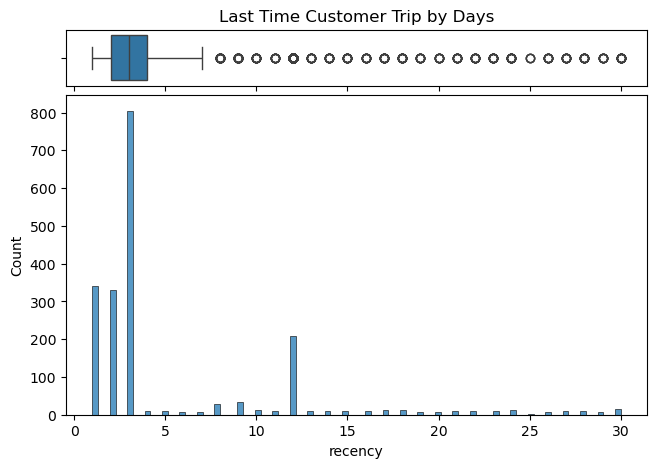

0.00     1.0
0.25     2.0
0.50     3.0
0.75     4.0
1.00    30.0
Name: recency, dtype: float64

In [76]:
fig, (ax_top, ax_bot) = plt.subplots(
                        nrows=2,
                        ncols=1,
                        figsize=(7.5,5),
                        gridspec_kw={
                            'height_ratios':(0.15,0.85),
                            'hspace':0.05
                        }
                    )

sns.boxplot(data=df_customer, x = 'recency', ax=ax_top)
sns.histplot(data=df_customer, x = 'recency', ax=ax_bot)
ax_top.set(
    title = 'Last Time Customer Trip by Days'
)

plt.show()
display(df_customer['recency'].quantile([0,0.25,0.5,0.75,1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan recency-nya ke dalam 4 kelompok yaitu :
- 4 (Active) : melakukan transaksi kurang dari 2 hari terakhir
- 3 (Warm) : melakukan transaksi antara 3 hingga 2 hari terakhir
- 2 (Cold) : melakukan transaksi antara 4 hingga 30 hari terakhir
- 1 (Inactive) : melakukan transaksi lebih dari 30 hari terakhir

In [77]:
# bagi menjadi 4 kelompok
df_customer['r_score']= pd.qcut(
    df_customer['recency'],     # data
    q=4,                         # dibagi menjadi 4 kelompok sama banyak
    labels=[4,3,2,1]            # pelabelan, untuk recenc, semakin kecil maka semakin besar scornya
).astype(int)

df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_trip,r_score
payCardID,,,,,,
639040716958,2,23,3,0.0,0.0,4
6552821364099885,3,28,37,0.0,0.0,3
3547463230183083,1,1,1,20000.0,20000.0,4
30128251923093,1,23,4,7000.0,1750.0,4
4245292824652416,3,28,39,0.0,0.0,3


**Frequency Segmentation**

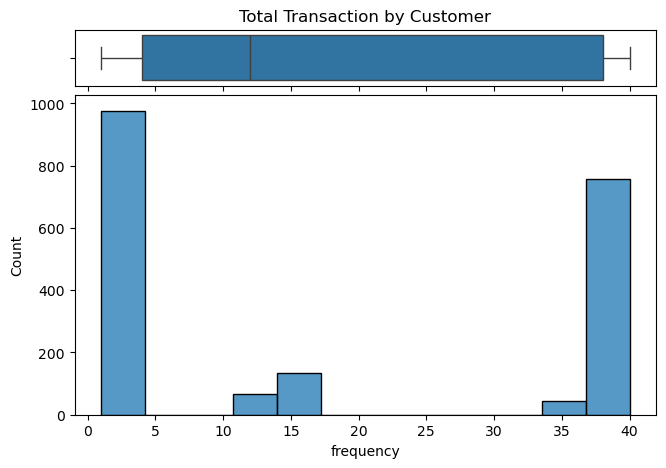

0.00     1.0
0.25     4.0
0.50    12.0
0.75    38.0
1.00    40.0
Name: frequency, dtype: float64

In [78]:
fig, (ax_top, ax_bot) = plt.subplots(
                        nrows=2,
                        ncols=1,
                        figsize=(7.5,5),
                        gridspec_kw={
                            'height_ratios':(0.15,0.85),
                            'hspace':0.05
                        }
                    )

sns.boxplot(data=df_customer, x = 'frequency', ax=ax_top)
sns.histplot(data=df_customer, x = 'frequency', ax=ax_bot)
ax_top.set(
    title = 'Total Transaction by Customer'
)

plt.show()
display(df_customer['frequency'].quantile([0,0.25,0.5,0.75,1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan frequency-nya ke dalam 4 kelompok mengacu pada jumlah transaksi yang kita tentukan yaitu:
- 4 (Loyal) : melakukan transaki lebih dari 38 kali
- 3 (High) : melakukan transaksi 12 hingga 38 kali
- 2 (Medium) : melakukan transaksi 4 hingga 11 kali
- 1 (Low) : melakukan transaksi hanya 1 kali.

In [79]:
# bagi menjadi 4 kelompok
df_customer['f_score']= pd.qcut(
    df_customer['frequency'],     # data
    q=4,                         # dibagi menjadi 4 kelompok sama banyak
    labels=[1,2,3,4]            # pelabelan, untuk frequency, semakin besar maka semakin besar scornya
).astype(int)

df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_trip,r_score,f_score
payCardID,,,,,,,
639040716958,2,23,3,0.0,0.0,4,1
6552821364099885,3,28,37,0.0,0.0,3,3
3547463230183083,1,1,1,20000.0,20000.0,4,1
30128251923093,1,23,4,7000.0,1750.0,4,1
4245292824652416,3,28,39,0.0,0.0,3,4


**Monetary Segmentation**

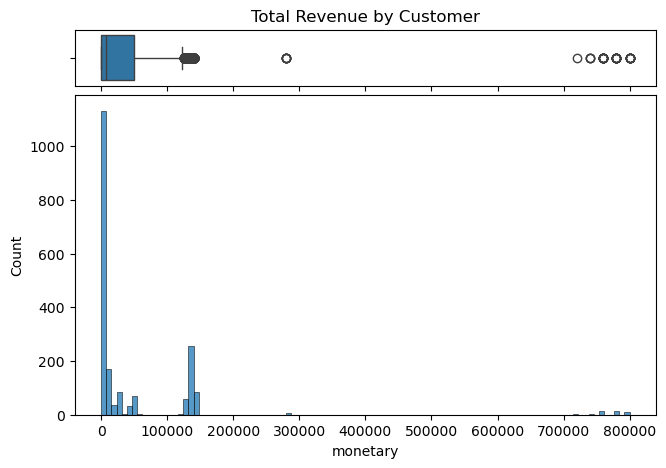

0.00         0.0
0.25         0.0
0.50      7000.0
0.75     49000.0
1.00    800000.0
Name: monetary, dtype: float64

In [80]:
fig, (ax_top, ax_bot) = plt.subplots(
                        nrows=2,
                        ncols=1,
                        figsize=(7.5,5),
                        gridspec_kw={
                            'height_ratios':(0.15,0.85),
                            'hspace':0.05
                        }
                    )

sns.boxplot(data=df_customer, x = 'monetary', ax=ax_top)
sns.histplot(data=df_customer, x = 'monetary', ax=ax_bot)
ax_top.set(
    title = 'Total Revenue by Customer'
)

plt.show()
display(df_customer['monetary'].quantile([0,0.25,0.5,0.75,1]))

Berdasarkan distribusi di atas, kita akan kelompokkan customer berdasarkan monetary-nya ke dalam 4 kelompok yaitu :
- 4 (Top Spender) : melakukan transaksi lebih dari 49000 rupiah
- 3 (High Spender) : melakukan transaksi antara 7000 hingga 49000 rupiah
- 2 (Medium Spender) : melakukan transaksi antara 0 hingga 7000 rupiah
- 1 (Low Spender) : melakukan transaksi 0 rupiah

In [81]:
# Define custom bin edges
bin_edges = [0, 7000, 49000, 800000, df_customer['monetary'].max() + 1]
labels = [1, 2, 3, 4]

# Apply pd.cut
df_customer['m_score'] = pd.cut(
    df_customer['monetary'], 
    bins=bin_edges, 
    labels=labels, 
    right=False  
).astype(int)

df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_trip,r_score,f_score,m_score
payCardID,,,,,,,,
639040716958,2,23,3,0.0,0.0,4,1,1
6552821364099885,3,28,37,0.0,0.0,3,3,1
3547463230183083,1,1,1,20000.0,20000.0,4,1,2
30128251923093,1,23,4,7000.0,1750.0,4,1,2
4245292824652416,3,28,39,0.0,0.0,3,4,1


**RFM Segementation**

Selanjutnya kita akan menggabungan r_score, f_score, dan m_score menjadi rfm_score

In [82]:
df_customer['rfm_score']=df_customer['r_score'] + df_customer['f_score']+ df_customer['m_score']
df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_trip,r_score,f_score,m_score,rfm_score
payCardID,,,,,,,,,
639040716958,2,23,3,0.0,0.0,4,1,1,6
6552821364099885,3,28,37,0.0,0.0,3,3,1,7
3547463230183083,1,1,1,20000.0,20000.0,4,1,2,7
30128251923093,1,23,4,7000.0,1750.0,4,1,2,7
4245292824652416,3,28,39,0.0,0.0,3,4,1,8


Lalu kita akan kelompokkan kedalam 4 segmen dengan ketentuan berikut:

In [83]:
def rfm_segmentation(x):
    if x<=5:
        return '4. At Risk Customers'
    elif x<=7:
        return '3. Occasional Customers'
    elif x<=10:
        return '2. Loyal Customers'
    else:
        return '1. Best Customers'

In [84]:
df_customer['rfm_level']=df_customer['rfm_score'].apply(rfm_segmentation)
df_customer.sample(5, random_state=42)

,recency,customer_age,frequency,monetary,avg_spend_per_trip,r_score,f_score,m_score,rfm_score,rfm_level
payCardID,,,,,,,,,,
639040716958,2,23,3,0.0,0.0,4,1,1,6,3. Occasional Customers
6552821364099885,3,28,37,0.0,0.0,3,3,1,7,3. Occasional Customers
3547463230183083,1,1,1,20000.0,20000.0,4,1,2,7,3. Occasional Customers
30128251923093,1,23,4,7000.0,1750.0,4,1,2,7,3. Occasional Customers
4245292824652416,3,28,39,0.0,0.0,3,4,1,8,2. Loyal Customers


Menambahkan kolom baru pada dataset df mengenai informasi rfm level

In [85]:
# Create a dictionary mapping payCardID to rfm_level
rfm_mapping = df_customer['rfm_level'].to_dict()

# Map the rfm_level to df using payCardID
df['rfm_level'] = df['payCardID'].map(rfm_mapping)

Kini kolom baru sudah ditambahkan.

### **3.5 Outlier**  

Kini dataset memiliki 36442 baris dan 31 kolom. Berdasarkan data yang ada mari memeriksa outlier.

In [86]:
print(f'Dataset df kini memiliki {len(df)} baris dan {df.shape[1]} kolom')

Dataset df kini memiliki 36442 baris dan 31 kolom


In [87]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[column] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outliers': df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].tolist()
        }

    return outliers

def count_outliers(df):
    outliers_info = detect_outliers_iqr(df)
    outliers_count = {col: len(info['outliers']) for col, info in outliers_info.items()}
    return outliers_count

outliers_info = detect_outliers_iqr(df)
outliers_count = count_outliers(df)

# Membuat dataframe untuk informasi outlier
outliers_info_df = pd.DataFrame([
    {
        'Column': col,
        'Lower Bound': info['lower_bound'],
        'Upper Bound': info['upper_bound'],
        'Outliers': info['outliers']
    } for col, info in outliers_info.items()
])

# Membuat dataframe untuk jumlah outlier
outliers_count_df = pd.DataFrame([
    {'Column': col, 'Outliers Count': count}
    for col, count in outliers_count.items()
])

print("Outliers:")
display(outliers_info_df)

print("\nOutliers Count DataFrame:")
display(outliers_count_df)

Outliers:


,Column,Lower Bound,Upper Bound,Outliers
0,payCardBirthDate,1953.500000,2029.500000,"[1953, 1946, 1953, 1946, 1953, 1946, 1953, 194..."
1,direction,-1.500000,2.500000,[]
2,tapInStopsLat,-6.351289,-6.070153,"[-6.354871, -6.368735, -6.370321, -6.368735, -..."
3,tapInStopsLon,106.685270,107.000470,"[107.02206, 106.61473, 107.02384, 107.02069, 1..."
4,stopStartSeq,-18.500000,41.500000,"[45, 48, 42, 46, 47, 44, 47, 52, 56, 46, 45, 5..."
5,tapOutStopsLat,-6.355958,-6.066002,"[-6.363462, -6.368735, -6.368735, -6.368735, -..."
6,tapOutStopsLon,106.679830,107.004950,"[106.66501, 106.61807, 107.02153, 106.61649, 1..."
7,stopEndSeq,-16.000000,56.000000,"[59.0, 57.0, 58.0, 57.0, 57.0, 66.0, 67.0, 60...."
8,payAmount,-5250.000000,8750.000000,"[20000.0, 20000.0, 20000.0, 20000.0, 20000.0, ..."
9,age,-6.500000,69.500000,"[70, 77, 70, 77, 70, 77, 70, 77, 70, 77, 70, 7..."



Outliers Count DataFrame:


,Column,Outliers Count
0,payCardBirthDate,326
1,direction,0
2,tapInStopsLat,394
3,tapInStopsLon,537
4,stopStartSeq,1482
5,tapOutStopsLat,359
6,tapOutStopsLon,446
7,stopEndSeq,579
8,payAmount,1683
9,age,326


Terdapat outlier pada 11 kolom. Namun, kolom-kolom tersebut cenderung memiliki data unik sehingga data outlier teteap digunakan dalam analisis data untuk memberikan informasi dan mengurangi bias.

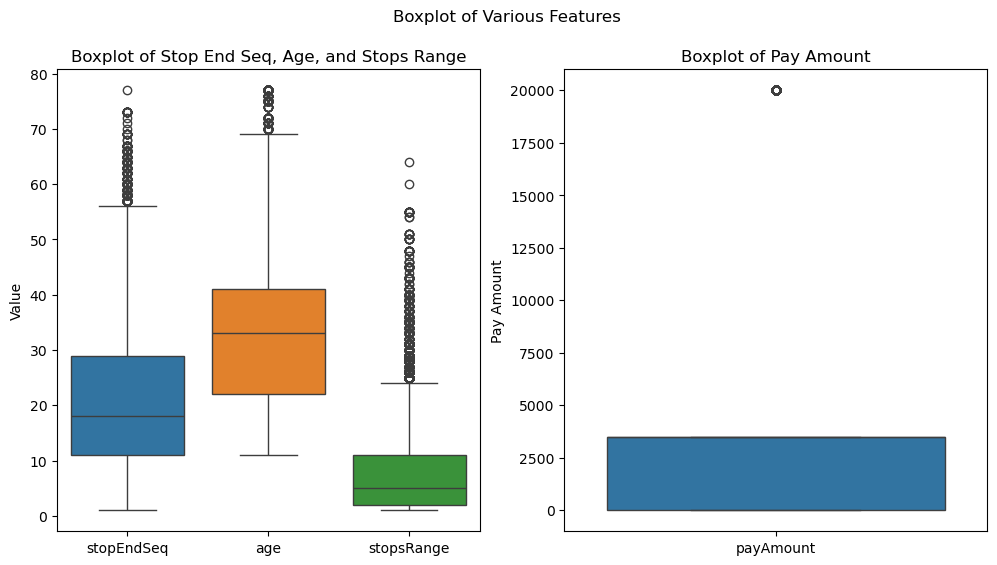

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df[['stopEndSeq', 'age', 'stopsRange']], ax=axes[0])
axes[0].set_title('Boxplot of Stop End Seq, Age, and Stops Range')
axes[0].set_ylabel('Value')

sns.boxplot(data=df[['payAmount']], ax=axes[1])
axes[1].set_title('Boxplot of Pay Amount')
axes[1].set_ylabel('Pay Amount')

plt.suptitle('Boxplot of Various Features')
plt.show()

Boxplot di atas merupakan penggambaran outlier yang ada pada kolom `stopEndSeq`, `age`, `stopsRange`, dan `payAmount`. Pada kolom payAmount, terlihat bahwa outlier hanya berkumpul di nilai 20000, hal ini karena hanya ada 3 jenis tarif perjalanan, yaitu 0, 3500, dan 20000.

In [89]:
cols_to_convert = ['tapInHour','tapOutHour', 'travelDuration']
new_col_convert = df[cols_to_convert].astype(object)
display(new_col_convert.describe(include='object').T, df.describe(include='object').T)

,count,unique,top,freq
tapInHour,36442.0,17.0,6.00,5619.0
tapOutHour,36442.0,20.0,18.00,4367.0
travelDuration,36442.0,6164.0,76.75,18.0


,count,unique,top,freq
transID,36442,36442,EIIW227B8L34VB,1
payCardID,36442,1977,4705243679928131,40
payCardBank,36442,6,dki,18001
payCardName,36442,1970,Fathonah Saefullah,79
payCardSex,36442,2,F,19399
corridorID,36442,221,1T,394
corridorName,36442,216,Cibubur - Balai Kota,394
tapInStops,36442,2508,P00170,235
tapInStopsName,36442,2507,Penjaringan,235
tapOutStops,36442,2200,P00016,315


Pada variabel kategorikal, tidak ditemukan anomali, sehingga analisis dapat dilanjutkan.

### **3.6 Data Bersih**  

Sebelumnya dataset ini memiliki 37900 baris dan 22 kolom, setelah proses _handling missing value_ dan pemeriksaan outlier, dataset ini memiliki 36442 baris dan 31 kolom.

In [90]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(36442, 31)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,36442,"[IODB654E2V80FH, DOJT383V5V99DP]"
1,payCardID,object,0,1977,"[347922988875941, 4511533243601477]"
2,payCardBank,object,0,6,"[dki, brizzi]"
3,payCardName,object,0,1970,"[Mulyanto Yulianti, Drs. Lasmanto Wacana]"
4,payCardSex,object,0,2,"[M, F]"
5,payCardBirthDate,int64,0,66,"[1990, 1978]"
6,corridorID,object,0,221,"[8D, JAK.11]"
7,corridorName,object,0,216,"[Cibubur - BKN, Ragunan - Dukuh Atas 2]"
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,0,2508,"[P00246, P00070]"


Menyimpan dataset bersih

In [91]:
df.to_excel('Transjakarta_clean1.xlsx', index=False)

In [92]:
df.to_csv('Transjakarta_clean.csv', index=False)

## __4. Exploratory Data Analysis__

---
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **minat dan pola penggunaan moda transportasi Transjakarta selama bulan April 2023**. Pertama, mari lihat keseluruhan data yang dimiliki. 

#### __4.1. Descriptive Analysis__

##### __4.1.1. Jumlah Transaksi Transjakarta Bulan April 2023__

Pertama, mari kita lihat jumlah transaksi selama bulan April 2023. Kita akan menganalisis kolom `payCardID` dan `payCardName` untuk menjawab pertanyaan-pertanyaan berikut:

1. Bagaimana frekuensi perjalanan pelanggan?

In [93]:
# Jumlah transaksi
print(f"Terdapat total {len(df)} transaksi yang tercatat dengan lengkap dalam dataset ini.")

Terdapat total 36442 transaksi yang tercatat dengan lengkap dalam dataset ini.


In [94]:
print(f"Dari total transaksi yang ada terdapat {len(df.groupby('payCardID')['payCardName'].nunique().sort_values(ascending=False))} pelanggan, yang menggunakan Transjakarta minimal 1 kali dalam sebulan.")

Dari total transaksi yang ada terdapat 1977 pelanggan, yang menggunakan Transjakarta minimal 1 kali dalam sebulan.


Mengelompokkan pelanggan berdasarkan frekuensi perjalanan menggunakan Transjakarta

In [95]:
# Menghitung jumlah perjalanan setiap pelanggan dalam sebulan
travel_freq = df[['payCardID', 'transID']].groupby('payCardID', as_index=False).count().sort_values(by='transID',ascending=False)
travel_freq.columns = ['payCardID','travelCount']
travel_freq.head()

,payCardID,travelCount
1644,5348700024599545,40
1118,4268640600849949,40
173,213174928876354,40
1125,4290559479079,40
1859,6523645346654293,40


In [96]:
# Mengelompokkan pelanggan berdasarkan jumlah trip dalam sebulan
frequency_distribution = travel_freq['travelCount'].value_counts().sort_values()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18296\241061560.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, palette='viridis')


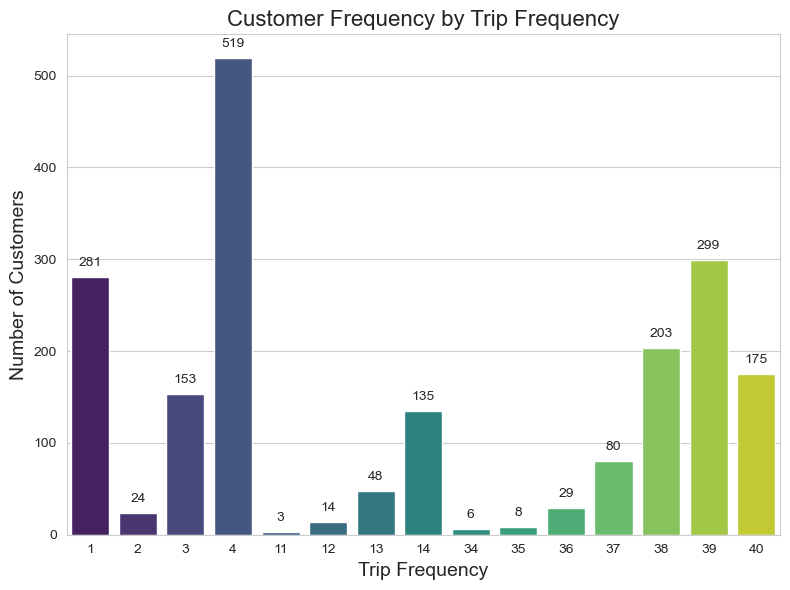

In [97]:
# Membuat barplot berdasarkan frequensi perjalanan
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, palette='viridis')

# Adding title and labels
ax.set_title('Customer Frequency by Trip Frequency', fontsize=16)
ax.set_xlabel('Trip Frequency', fontsize=14)
ax.set_ylabel('Number of Customers', fontsize=14)

# Adding value labels on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

__Insight__
- Jumlah pelanggan dalam kelompok frekuensi perjalanan rendah (1-4 kali dalam sebulan) cukup tinggi, hampir dua kali lipat lebih banyak dibandingkan dengan pelanggan yang sering menggunakan Transjakarta.
- Di sisi lain, terlihat pada kelompok frekuensi perjalanan tinggi (36-40 kali dalam sebulan), menunjukkan bahwa terdapat pelanggan yang setia menggunakan Transjakarta secara rutin.
- Hal ini menunjukkan bahwa meskipun Transjakarta memiliki basis pelanggan setia, masih ada peluang untuk meningkatkan keterlibatan (_engagement_) dari pelanggan dengan frekuensi perjalanan rendah.

Berdasar penemuan ini, mari melihat jumlah pengguna berdasarkan RFM level.

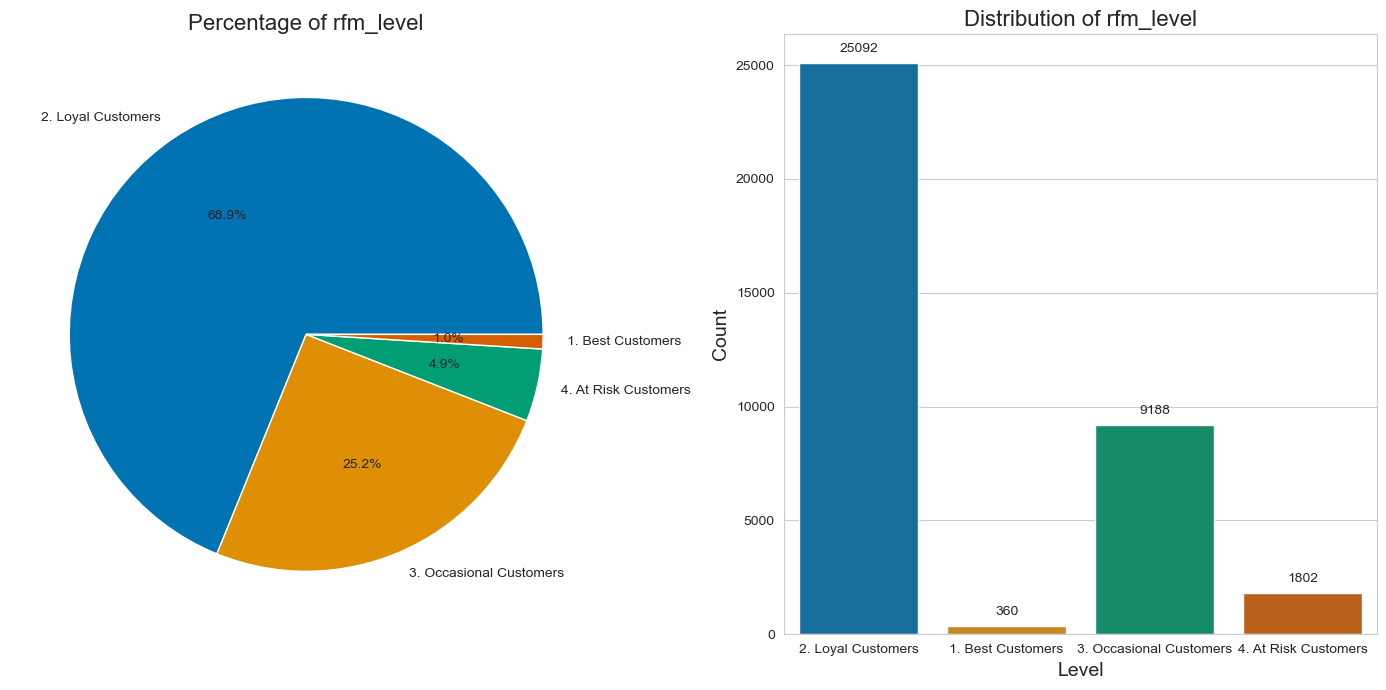

In [98]:
# Membuat fungsi
def bar_pie(col,xlabel,ylabel):  
    # Membuat grid untuk layout
    fig = plt.figure(figsize=(14, 7))
    gs = fig.add_gridspec(1, 2)

    # Barplot
    ax1 = fig.add_subplot(gs[0, 1])
    sns.set_style("whitegrid")
    sns.countplot(x=col, data=df, palette='colorblind', hue = col, ax=ax1)
    ax1.set_title(f'Distribution of {col}', fontsize=16)
    ax1.set_xlabel(xlabel, fontsize=14)
    ax1.set_ylabel(ylabel, fontsize=14)

    # Menambahkan nilai di atas bar
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

    # Pie chart
    ax2 = fig.add_subplot(gs[0, 0])
    col_counts = df[col].value_counts()
    ax2.pie(col_counts, labels=col_counts.index, autopct='%1.1f%%', colors=sns.color_palette('colorblind', len(col_counts)))
    ax2.set_title(f'Percentage of {col}', fontsize=16)

    # Menampilkan plot
    plt.tight_layout()
    plt.show()

# membuat grafik
bar_pie('rfm_level', 'Level', 'Count')

Berikut interpretasi RFM Level

- `Best Customers`: High recency, high frequency, and high monetary value.
- `Loyal Customers`: Moderate recency, frequency, and monetary value.
- `Occasional Customers`: Low recency and frequency, but moderate monetary value.
- `At Risk Customers`: Low recency, low frequency, and low monetary value.

__Insight__

- Mayoritas pengguna Transjakarta masuk ke dalam segmen "Loyal customer" yang artinya memberikan pendapatan tertinggi dan menggunakan moda transportasi ini secara rutin.
- Proporsi "Occasional Customers" menunjukkan jumlah yang signifikan. Pelanggan ini lebih jarang menggunakan Transjakarta tetapi berkontribusi dalam pendapatan Transjakarta. Terdapat peluang untuk menarik kelompok pelanggan ini menjadi "Loyal Customer".
- Kelompok "At Risk Customer" memiliki keterikatan dan frekuensi penggunaan Transjakarta yang rendah. Kita dapat meningkatkan minat pelanggan dari kelompok ini dengan melakukan survey terlebih dahulu untuk mencari tahu alasan mengapa Transjakarta tidak menjadi pilihan pertama mereka.
- Kelompok "Best Customer" memiliki proporsi paling sedikit. Kepuasan kelompok ini perlu dijaga dan ditingkatkan.   


##### __4.1.2. Proporsi Jenis Kelamin Pengguna__

Bagian ini untuk menjawab bagaimana demografi pengguna yang paling banyak menggunakan Transjakarta, dilihat dari jenis kelaminnya. Kolom yang akan dianalisis adalah `payCardSex`, `rfm_level`

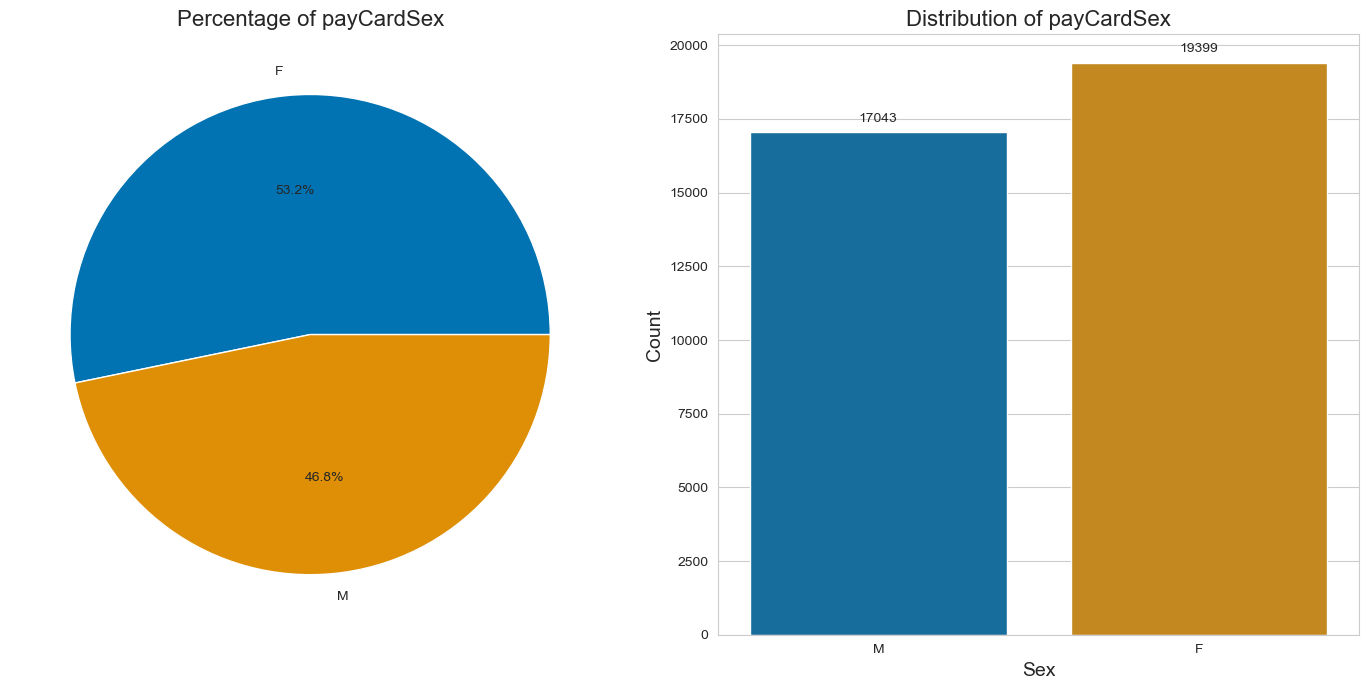

In [99]:
# membuat grafik
bar_pie('payCardSex', 'Sex', 'Count')

Membuat grafik berdasarkan banyaknya pelanggan di tiap RFM Level berdasarkan jenis kelamin

In [100]:
# Banyaknya penumpang wanita pada tiap level
df_class_female = df[df['payCardSex']=='F'].groupby('rfm_level', as_index=False)[['payCardID']].count()
df_class_female

,rfm_level,payCardID
0,1. Best Customers,200
1,2. Loyal Customers,13385
2,3. Occasional Customers,4849
3,4. At Risk Customers,965


In [101]:
# Banyaknya penumpang pria pada tiap level
df_class_male = df[df['payCardSex']=='M'].groupby('rfm_level', as_index=False)[['payCardID']].count()
df_class_male

,rfm_level,payCardID
0,1. Best Customers,160
1,2. Loyal Customers,11707
2,3. Occasional Customers,4339
3,4. At Risk Customers,837


In [102]:
import plotly.graph_objects as go

# Membuat sebuah kanvas
fig = go.Figure()

# Membuat barplot female
female_barplot = go.Bar(
    y=df_class_female['rfm_level'],      # Sumbu-y: RFM level
    x=df_class_female['payCardID'],          # Sumbu-x: Jumlah pelanggan
    orientation='h',                    # Orientasi horizontal
    name='Female',                      # Label
    hoverinfo='all'                     # Menampilkan semua info saat di-hover
)

# Membuat barplot male
male_barplot = go.Bar(
    y=df_class_male['rfm_level'],        # Sumbu-y: RFM level
    x=df_class_male['payCardID'],            # Sumbu-x: Jumlah pelanggan
    orientation='h',                    # Orientasi horizontal
    name='Male',                        # Label
    hoverinfo='all'                     # Menampilkan semua info saat di-hover
)

# Menambahkan barplot female ke dalam figure
fig.add_trace(female_barplot)

# Menambahkan barplot male ke dalam figure
fig.add_trace(male_barplot)

# Meng-update layout
fig.update_layout(
    barmode='stack',                            # Mengubah menjadi stacked bar
    title_text='Number of Customer by RFM Level and Gender',
    title_x=0.5,
    xaxis_title='Number of Customer',
    yaxis_title='RFM Level',
    hoverlabel=dict(
        bgcolor='white',
        font_size=16,
        font_family='Rockwell'
    ),
    yaxis=dict(
        tickmode='array',
        tickvals=df_class_female['rfm_level'],  # Disesuaikan dari nilai data df
    )
)

fig.show()

__Insight__

- Kedua kelompok gender memiliki proporsi yang hampir setara sebagai "Loyal Customers", namun secara keseluruhan pelanggan `wanita lebih mendominasi` dalam penggunaan Transjakarta bulan April ini.

##### __4.1.3. Proporsi Preferensi Kartu Pengguna__

Ketiga, mengeksplorasi preferensi pengguna dalam memilih bank yang digunakan untuk transaksi selama perjalanan dengan TransJakarta. Kolom yang dianalisis adalah `payCardBank` dan `rfm_level`

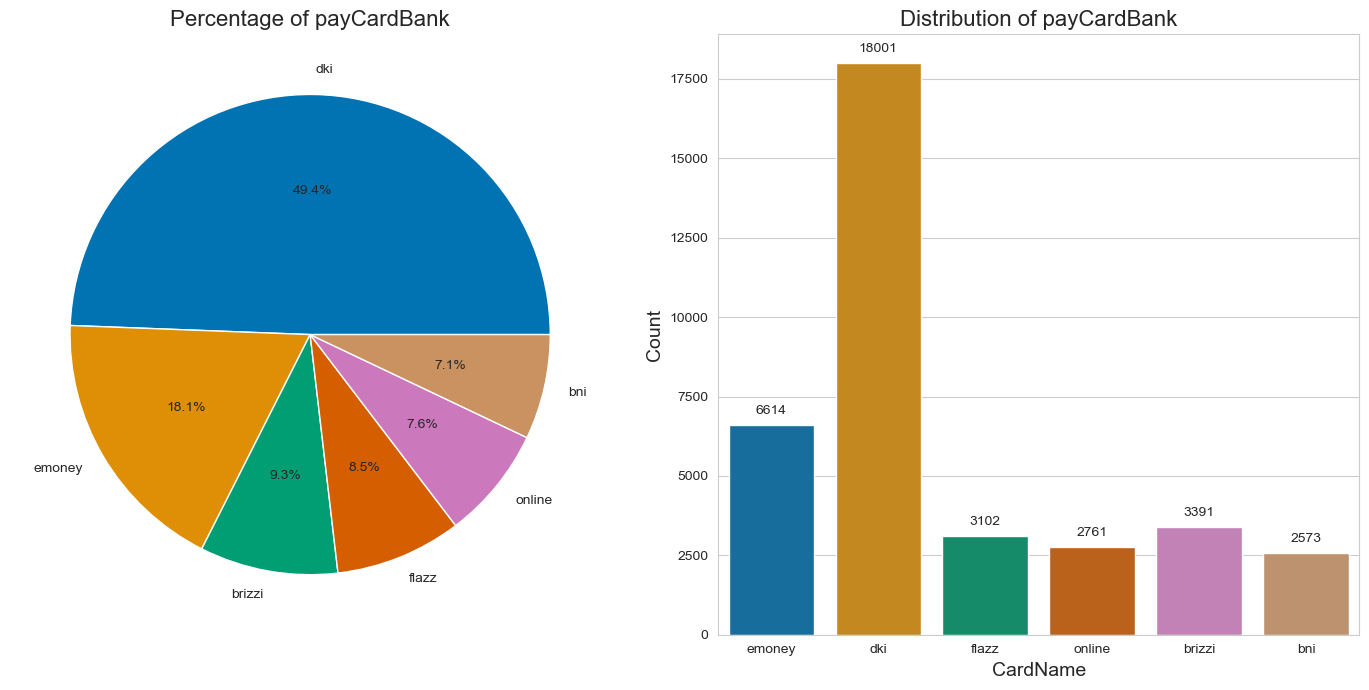

In [103]:
bar_pie('payCardBank', 'CardName', 'Count')

<Figure size 1200x800 with 0 Axes>

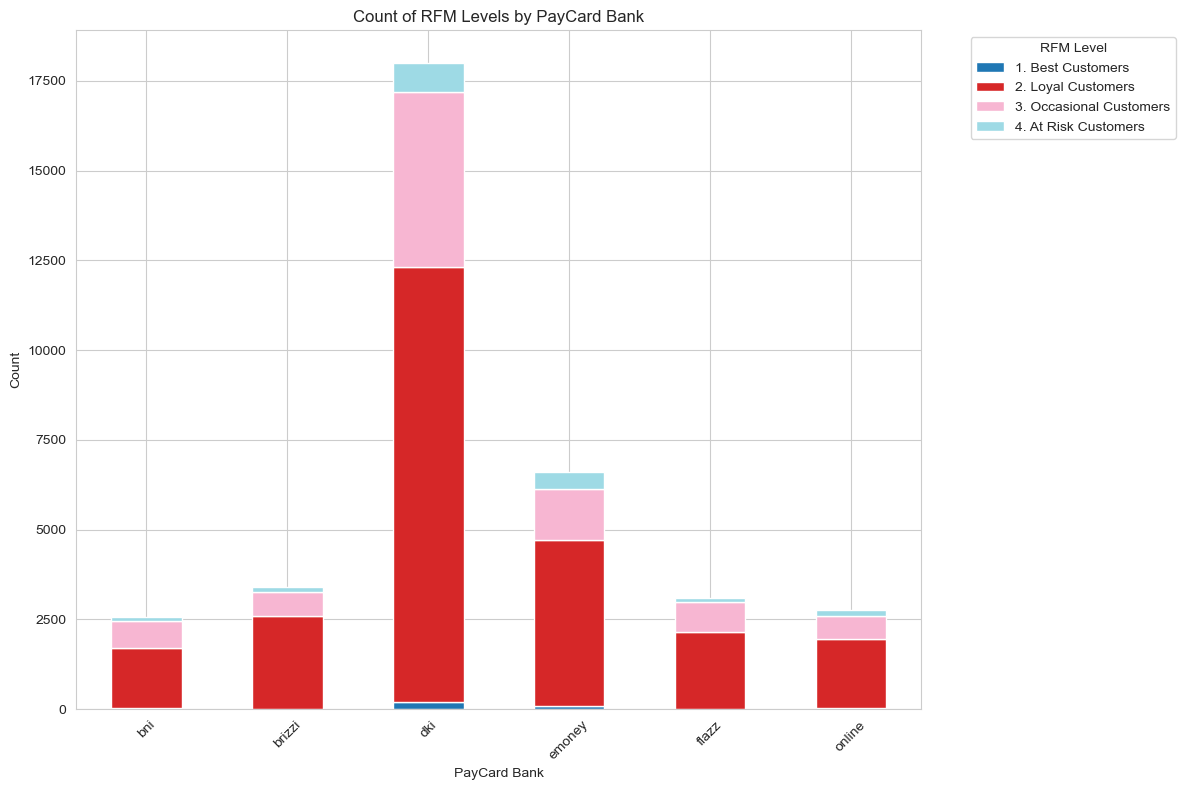

In [104]:
# Compute counts
count_df = df.groupby(['payCardBank', 'rfm_level']).size().reset_index(name='count')

# Create pivot table
pivot_df = count_df.pivot_table(index='payCardBank', columns='rfm_level', values='count', aggfunc='sum', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 8))

plt.title('Count of RFM Levels by PayCard Bank')
plt.xlabel('PayCard Bank')
plt.ylabel('Count')
plt.legend(title='RFM Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

__Insight__
- Terdapat 6 payCardBank yang tercatat: dki, emoney, brizzi, flazz, online, dan bni.
- Hampir 50% transaksi pada April 2023 dilakukan menggunakan kartu `dki`.
- payCardBank yang paling sedikit digunakan adalah `bni`.
- Berdasarkan, rfm_level juga menunjukkan bahwa "Best Customer", "Loyal Customer", dan "Occasional Customer" paling banyak menggunaka kartu `dki` daripada pilihan kartu lainnya.

##### __4.1.4. Distribusi Umur Pengguna__

Keempat, untuk mengetahui karakteristik pengguna lebih dalam kolom `age` akan dianalisis untuk menjawab pertanyaan berikut ini:
1.  Berapa rentang umur pengguna Transjakarta pada bulan April 2023?
2.  Berapa rata-rata umur pengguna transportasi Transjakarta pada bulan April 2023?
3.  Kelompok umur berapa yang paling banyak menggunakan Transjakarta pada bulan April 2023?
4.  Kelompok umur berapa yang paling sedikit menggunakan Transjakarta pada bulan April 2023?

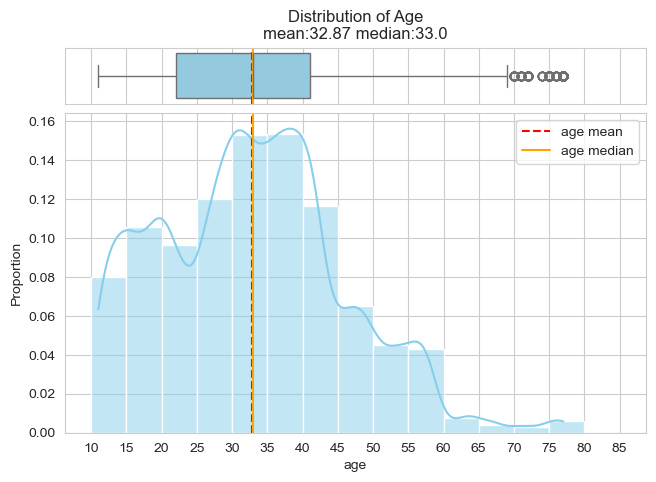

In [105]:
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})

ax1.set_title(f"Distribution of Age\nmean:{df['age'].mean():.2f} median:{df['age'].median()}")
sns.boxplot(x = df['age'], ax = ax1, color='skyblue')
ax1.axvline(df['age'].mean(), color='r', linestyle='--')
ax1.axvline(df['age'].median(), color='orange', linestyle='-')

sns.histplot(data = df['age'], ax = ax2, stat = "proportion", kde=True,binwidth=5,binrange=(10, 85), color='skyblue')
ax2.axvline(df['age'].mean(), color='r', linestyle='--', label='age mean')
ax2.axvline(df['age'].median(), color='orange', linestyle='-', label='age median')
# Menambah ticks pada sumbu x agar lebih presisi
xticks = range(10, 90, 5)
ax2.set_xticks(xticks)
ax2.set_xticklabels([str(tick) for tick in xticks])

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [106]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
np.sort(outliers['age'].unique())

array([70, 71, 72, 74, 75, 76, 77], dtype=int64)

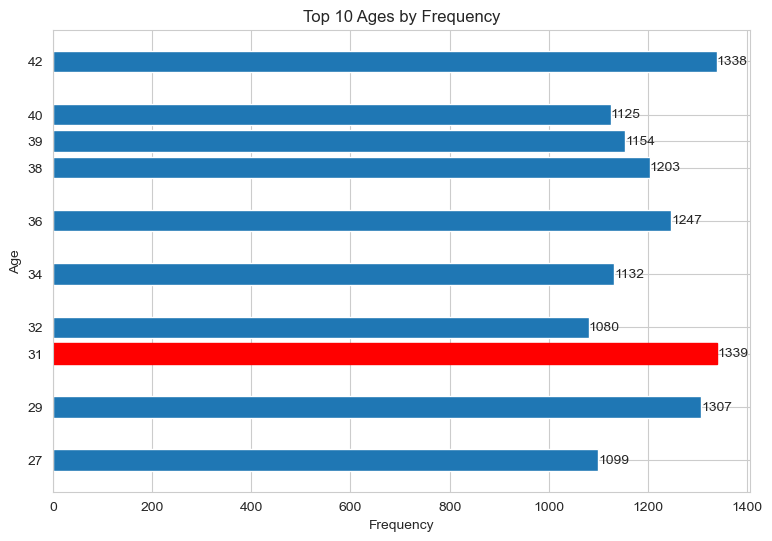

In [107]:
# Menemukan Top 10 kelompok umur yang paling sering menggunakan Transjakarta
top_10_ages = df['age'].value_counts().sort_values(ascending=False).head(10)

def barh_(data):
    fig = plt.figure(figsize=(9,6))
    ax1 = plt.subplot(111)

    # Membuat barplot horizontal
    ret = ax1.barh(data.index, data.values)

    # Setting warna berbeda pada bar nilai frequency maximum
    max_freq_index = data.values.argmax()
    ret[max_freq_index].set_color('red')

    # Memberi info pada setiap bar
    for bar in ret:
        ax1.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center')

    # Menambahkan label dan judul
    ax1.set_yticks(data.index)
    ax1.set_yticklabels(data.index)
    ax1.set_xlabel('Frequency')
    ax1.set_ylabel('Age')
    ax1.set_title('Top 10 Ages by Frequency')

    plt.show()

barh_(top_10_ages)

In [108]:
print(f"Umur termuda yang menggunakan Transjakarta pada bulan April 2023 {df['age'].min()} tahun")
print(f"Umur tertua yang menggunakan Transjakarta pada bulan April 2023 {df['age'].max()} tahun")

Umur termuda yang menggunakan Transjakarta pada bulan April 2023 11 tahun
Umur tertua yang menggunakan Transjakarta pada bulan April 2023 77 tahun


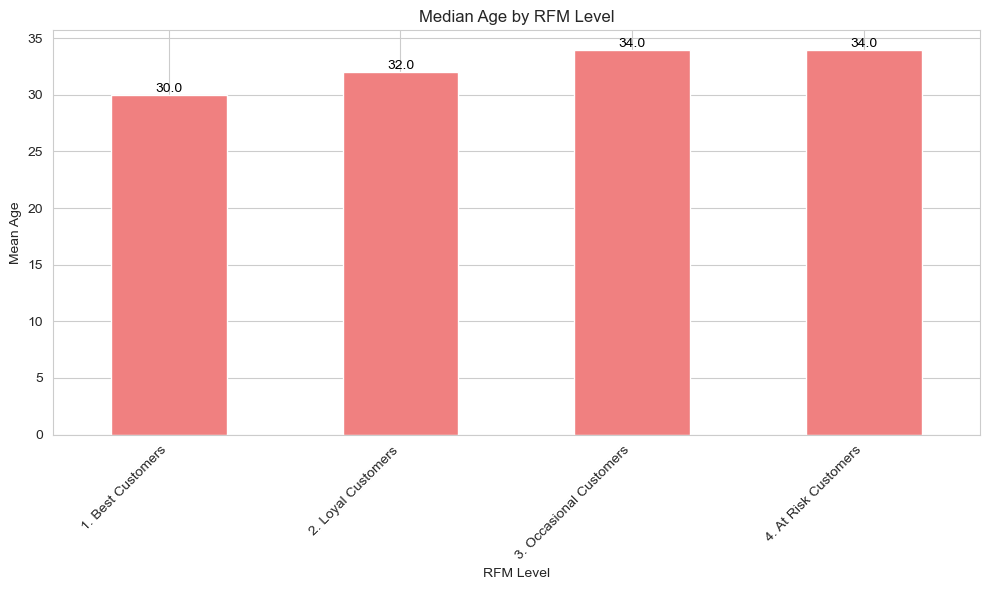

In [109]:
median_age = df.groupby('rfm_level')['age'].median()

# Plotting
# Plotting
plt.figure(figsize=(10, 6))
bars = median_age.plot(kind='bar', color='lightcoral')

for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height,  # Y position (height of the bar)
        f'{height:.1f}',  # Label text
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,   # Font size
        color='black'  # Font color
    )

plt.title('Median Age by RFM Level')
plt.xlabel('RFM Level')
plt.ylabel('Mean Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Insight**
- Rentang umur pengguna Transjakarta pada bulan April 2023 `11 - 77 tahun`.
- Rata-rata umur pengguna transportasi Transjakarta `32.87`.
- Median umur pengguna transportasi Transjakarta `33.0`.
- Kelompok umur 31 tahun paling banyak menggunakan Transjakarta.
- Sementara umur 70 tahun ke atas paling sedikit menggunakan Transjakarta.
- Berdasarka RFM Level, seluruh level didominasi oleh pelanggan berumur 30-an. 
- Berdasarkan data, Transjakarta lebih banyak digunakan oleh kelompok umur dewasa muda hingga dewasa yang masuk dalam usia produktif.

##### __4.1.5. 10 Koridor Terpopuler__

Kelima, kita akan melihat preferensi rute pengguna berdasarkan koridor yang paling sering dipilih dengan menganalisis kolom corridorID dan corridorName. Pertanyaan yang ingin dijawab adalah:
1. Koridor mana yang paling sering digunakan oleh pengguna pada bulan April 2023?
2. Koridor mana yang paling sedikit digunakan oleh pengguna pada bulan April 2023?
3. Bagaimana distribusi penggunaan koridor berdasarkan waktu (hari, seminggu)?
4. Bagaimana tren penggunaan koridor tertentu dari waktu ke waktu sepanjang bulan April 2023?

In [110]:
# Mapping untuk mengisi Name yang kosong
corr_id = list(df['corridorID'])
corr_name = list(df['corridorName'])

mapping_name = dict(zip(corr_id,corr_name))         #membuat kategori mapping 

In [111]:
# Mengelompokkan data berdasarkan corridorID dan menghitung frekuensi
def top10(id,name, map):
    x =df[[id, name]].groupby(id, as_index=False).count().sort_values(ascending=False, by=id)
    x.reset_index(drop=True)
    x.columns = [id, 'numOfCust']
    x[name] = None
    x[name] = x.apply(lambda row: fill_null(row, map, value=name,key=id), axis=1)
    x['IDName'] = x[name] + ' ('+ x[id]+')'
    x.drop(columns=[id,name],inplace=True)
    x=x[['IDName','numOfCust']]
    top_10 = x.sort_values(ascending=False, by='numOfCust').head(10).reset_index(drop=True)
    top_10 = top_10.sort_values(ascending=True, by='numOfCust')
    return top_10

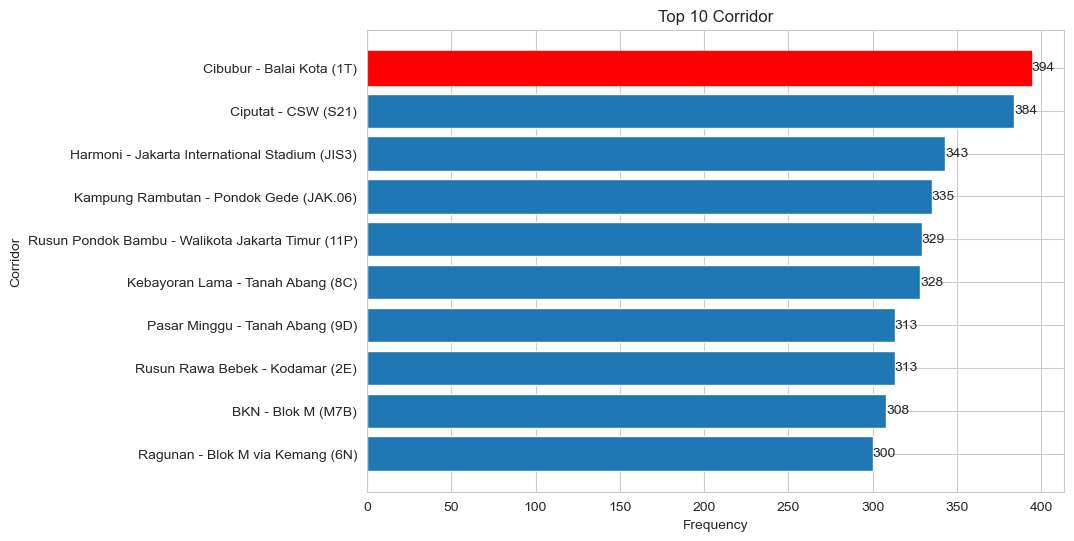

Top 10 Corridor berdasarkan frekuensi pengguna dalam bulan April 2023.


In [112]:
def barh_top10(data,col,values,title):
    fig = plt.figure(figsize=(9,6))
    ax1 = plt.subplot(111)

    # Membuat barplot horizontal
    ret = ax1.barh(data[col], data[values])

    # Setting warna berbeda pada bar nilai frequency maximum
    max_freq_index = data[values].argmax()
    ret[max_freq_index].set_color('red')

    # Memberi info pada setiap bar
    for bar in ret:
        ax1.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center')

    # Menambahkan label dan judul
    ax1.set_yticks(data[col])
    ax1.set_yticklabels(data[col])
    ax1.set_xlabel('Frequency')
    ax1.set_ylabel(title)
    ax1.set_title(f'Top 10 {title}')

    plt.show()

# Membuat grafik
barh_top10(top10('corridorID','corridorName',mapping_name),'IDName','numOfCust','Corridor')
print('Top 10 Corridor berdasarkan frekuensi pengguna dalam bulan April 2023.')

In [113]:
# Mengelompokkan data berdasarkan corridorID dan menghitung frekuensi
def bottom10(id,name, map):
    x =df[[id, name]].groupby(id, as_index=False).count().sort_values(ascending=False, by=id)
    x.reset_index(drop=True)
    x.columns = [id, 'numOfCust']
    x[name] = None
    x[name] = x.apply(lambda row: fill_null(row, map, value=name,key=id), axis=1)
    x['IDName'] = x[name] + ' ('+ x[id]+')'
    x.drop(columns=[id,name],inplace=True)
    x=x[['IDName','numOfCust']]
    top_10 = x.sort_values(ascending=False, by='numOfCust').tail(10).reset_index(drop=True)
    top_10 = top_10.sort_values(ascending=True, by='numOfCust')
    return top_10

display(bottom10('corridorID','corridorName',mapping_name).sort_values(ascending=True, by='numOfCust'))
print('10 Koridor dengan frekuensi pengguna terendah dalam bulan April 2023.')

,IDName,numOfCust
9,Matraman Baru - Ancol (M5),15
8,Kampung Rambutan - Blok M (7B),17
7,Tanah Abang - Kebayoran Lama via Pos Pengumben...,22
6,Term. Pulo Gadung - Lampiri (JAK.99),30
5,Senen - Tanah Abang (1R),38
4,Grogol - Pos Pengumben via Slipi (JAK.53),39
3,Gondangdia - Balai Kota (2Q),40
2,Pondok Kelapa - BKN (7P),49
0,Stasiun Manggarai - Blok M (6M),54
1,St. LRT Pegangsaan Dua - JIS (12P),54


10 Koridor dengan frekuensi pengguna terendah dalam bulan April 2023.


In [114]:
# Menemukan modus koridor berdasarkan tanggal dan hari
mode_corridorDay = df.groupby('dayIn')[['corridorID', 'corridorName']].agg(lambda x: x.mode().iloc[0])
mode_corridorDate = df.groupby('dateIn')[['dayIn','corridorID','corridorName']].agg(lambda x: x.mode())
mode_corridorsByDateDays = df.groupby(['corridorID','corridorName'])[['dateIn', 'dayIn']].agg(lambda x: x.mode().iloc[0])

In [115]:
mode_corridorDate

,dayIn,corridorID,corridorName
dateIn,,,
2023-04-01,Saturday,11D,Pulo Gebang - Pulo Gadung 2 via PIK
2023-04-02,Sunday,"[11N, 13B, 6B, JAK.46, M12, M4, S21]","[Ciputat - CSW, Pasar Minggu - Jagakarsa, Pulo..."
2023-04-03,Monday,"[1T, S21]","[Cibubur - Balai Kota, Ciputat - CSW]"
2023-04-04,Tuesday,1T,Cibubur - Balai Kota
2023-04-05,Wednesday,"[11P, 1T]","[Cibubur - Balai Kota, Rusun Pondok Bambu - Wa..."
2023-04-06,Thursday,1T,Cibubur - Balai Kota
2023-04-07,Friday,1T,Cibubur - Balai Kota
2023-04-08,Saturday,JAK.48A,Stasiun Tebet - Rusun Karet Tengsin
2023-04-09,Sunday,JAK.113,Rusun Sindang Koja - Kp. Sawah


In [116]:
# Definisikan urutan hari dalam seminggu
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = mode_corridorDay.sort_index(ascending=False).T
x[['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

dayIn,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
corridorID,1T,1T,1T,1T,1T,9C,JAK.120
corridorName,Cibubur - Balai Kota,Cibubur - Balai Kota,Cibubur - Balai Kota,Cibubur - Balai Kota,Cibubur - Balai Kota,Pinang Ranti - Bundaran Senayan,JIS - Terminal Muara Angke


Berikut merupakan koridor yang paling sering digunakan setiap harinya. Pada hari Senin-Jumat, koridor `Cibubur - Balai Kota (1T)` merupakan koridor yang paling banyak digunakan.
Sementara hari Sabtu `Pinang Ranti - Bundaran Senayan (9C)` dan hari Minggu `JIS - Terminal Muara Angke (JAK.120)`.

Pada tanggal 17 hingga 19 April 2023, terjadi peningkatan aktivitas di koridor `Kalideres - Bundaran HI via Veteran` akibat puncak arus mudik. Peningkatan ini disebabkan oleh penyediaan fasilitas mudik gratis oleh pemerintah di terminal Pulogadung dan Kalideres, yang mengakibatkan perubahan pola perjalanan selama periode tersebut.

Referensi: [IDN Times](https://www.idntimes.com/news/indonesia/dini-suciatiningrum/puncak-mudik-gratis-jakarta-berangkat-18-april-2023-dari-monas)

In [117]:
import re
# list nama top 10 corridors
def remove_brackets(text):
    return re.sub(r'\s*\(.*?\)\s*', '', text)
top_corName = [remove_brackets (name) for name in [name for name in top10('corridorID', 'corridorName', mapping_name)['IDName']][::-1]]

In [118]:
x = mode_corridorsByDateDays.reset_index()

# Inisiasi dataframe kosong
dfs = []

# Loop untuk membuat list top 10
for name in top_corName:
    filtered_df = x[x['corridorName'] == name]
    dfs.append(filtered_df)

# Concatenate semua dataframe dalam list
result = pd.concat(dfs, ignore_index=True)
display(result)
print('Hari dengan jumlah aktivitas tertinggi pada koridor Top 10')

,corridorID,corridorName,dateIn,dayIn
0,1T,Cibubur - Balai Kota,2023-04-04,Friday
1,S21,Ciputat - CSW,2023-04-18,Friday
2,JIS3,Harmoni - Jakarta International Stadium,2023-04-13,Friday
3,JAK.06,Kampung Rambutan - Pondok Gede,2023-04-14,Friday
4,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,2023-04-05,Friday
5,8C,Kebayoran Lama - Tanah Abang,2023-04-18,Monday
6,9D,Pasar Minggu - Tanah Abang,2023-04-14,Monday
7,2E,Rusun Rawa Bebek - Kodamar,2023-04-13,Friday
8,M7B,BKN - Blok M,2023-04-13,Friday
9,6N,Ragunan - Blok M via Kemang,2023-04-14,Monday


Hari dengan jumlah aktivitas tertinggi pada koridor Top 10


__Insight__
- Pada Top 10 corridor pada bulan April 2023, yaitu 
'Cibubur - Balai Kota (1T)',
 'Ciputat - CSW (S21)',
 'Harmoni - Jakarta International Stadium (JIS3)',
 'Kampung Rambutan - Pondok Gede (JAK.06)',
 'Rusun Pondok Bambu - Walikota Jakarta Timur (11P)',
 'Kebayoran Lama - Tanah Abang (8C)',
 'Pasar Minggu - Tanah Abang (9D)',
 'Rusun Rawa Bebek - Kodamar (2E)',
 'BKN - Blok M (M7B)',
 'Ragunan - Blok M via Kemang (6N)'
- Koridor `Cibubur - Balai Kota (1T)` merupakan rute yang 26 kali lebih banyak digunakan dalam bulan April daripada koridor `Matraman Baru - Ancol (M5)`.
- Koridor `Cibubur - Balai Kota	(1T)` paling banyak digunakan di hari kerja (Senin-Jumat), 
- Sementara di akhir pekan hari Sabtu, `Koridor Pinang Ranti - Bundaran Senayan (9C)` paling banyak digunakan. 
 - Transaksi di Top 10 koridor tersebut paling banyak dilakukan di hari Senin atau Jumat .
- Hari Minggu Koridor `JIS - Terminal Muara Angke (JAK.120)` paling banyak digunakan.
- Pada tanggal `18 - 19 April` Rute yang paling banyak digunakan Ciputat - CSW dan Kalideres - Bundaran HI via Veteran, pola berbeda dari hari 'Selasa' dan 'Rabu' biasanya karena terjadi puncak arus mudik.

In [119]:
mode_corridorLevel = df.groupby('rfm_level')[['corridorID', 'corridorName', 'payAmount']].agg(lambda x: x.mode().iloc[0])
mode_corridorLevel

,corridorID,corridorName,payAmount
rfm_level,,,
1. Best Customers,1T,Cibubur - Balai Kota,20000.0
2. Loyal Customers,S21,Ciputat - CSW,3500.0
3. Occasional Customers,JAK.58,Cilincing - Rorotan,0.0
4. At Risk Customers,JAK.37,Cililitan - Condet via Kayu Manis,0.0


__Insight__
- Berdasarkan tabel di atas, menunjukkan bahwa "Best Customer" sering menggunakan koridor Cibubur - Balai Kota (1T) yang memiliki kelompok payAmount Rp 20.000.- 
- Sementara "Loyal Customer" paling sering menggunakan koridor Ciputat - CSW (S21) dengan payAmount Rp 3.500.- 
- "Occasional Customer" dan "At Risk Customers" lebih sering menggunakan koridor berkode JAK dengan payAmount 0.	

##### __4.1.6. Koridor Favorit berdasarkan payAmount__

Mari kita menganalisis kolom `payAmount` dan `corridorID` dan `corridorName` untuk menjawab pertanyaan, manakah koridor yang paling populer berdasarkan kelompok tarifnya?

In [120]:
# Group by 'payAmountGroup' and 'corridorName' to get frequency
corridor_frequency = df.groupby(['payAmount', 'corridorID','corridorName']).size().reset_index(name='frequency')

# Find the most popular corridor in each pay amount group
most_popular_corridors_by_pay = corridor_frequency.loc[corridor_frequency.groupby('payAmount')['frequency'].idxmax()]
most_popular_corridors_by_pay

,payAmount,corridorID,corridorName,frequency
24,0.0,JAK.06,Kampung Rambutan - Pondok Gede,335
208,3500.0,S21,Ciputat - CSW,384
212,20000.0,1T,Cibubur - Balai Kota,394


__Insight__
- Pada bulan April, koridor yang bertarif Rp 20.000,- yang paling populer adalah Cibubur - Balai Kota (1T) 
- Sementara koridor yang bertarif Rp 3.500,- yang paling populer adalah Ciputat - CSW (S21)
- Koridor bertarif 0 yang paling populer Kampung Rambutan - Pondok Gede (JAK.06)
- Dari antara ketiganya, Cibubur - Balai Kota (1T) memiliki frequensi penggunaan yang tertinggi.

##### __4.1.7. Koridor Favorit berdasarkan Arah Rute__

Mari kita menganalisis kolom `direction` dan `corridorID` dan `corridorName` untuk menjawab pertanyaan, bagaimana aktivitas rute berdasarkan pergi dan kembali, setiap koridor yang populer dan yang paling tidak populer?

In [121]:
# Mengelompokkan berdasarkan direction dan corridorID, lalu menghitung jumlah kemunculan
corridor_counts = df.groupby(['direction', 'corridorID', 'corridorName']).size().reset_index(name='count')

# Mengurutkan berdasarkan direction dan jumlah kemunculan
corridor_counts = corridor_counts.sort_values(by=['direction', 'count'], ascending=[True, False])

# Memilih 10 koridor terbanyak untuk setiap arah
top_10_corridors_per_direction = corridor_counts.groupby('direction').head(10)

# Menampilkan hasil
top_10_corridors_per_direction.reset_index(drop=True)

,direction,corridorID,corridorName,count
0,0.0,1T,Cibubur - Balai Kota,196
1,0.0,S21,Ciputat - CSW,191
2,0.0,JIS3,Harmoni - Jakarta International Stadium,171
3,0.0,JAK.06,Kampung Rambutan - Pondok Gede,167
4,0.0,11P,Rusun Pondok Bambu - Walikota Jakarta Timur,165
5,0.0,8C,Kebayoran Lama - Tanah Abang,163
6,0.0,2E,Rusun Rawa Bebek - Kodamar,158
7,0.0,6N,Ragunan - Blok M via Kemang,153
8,0.0,JAK.72,Kampung Rambutan - Pasar Rebo via Poncol,153
9,0.0,M7B,BKN - Blok M,152


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18296\1784693944.py:6: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



<Figure size 2000x1000 with 0 Axes>

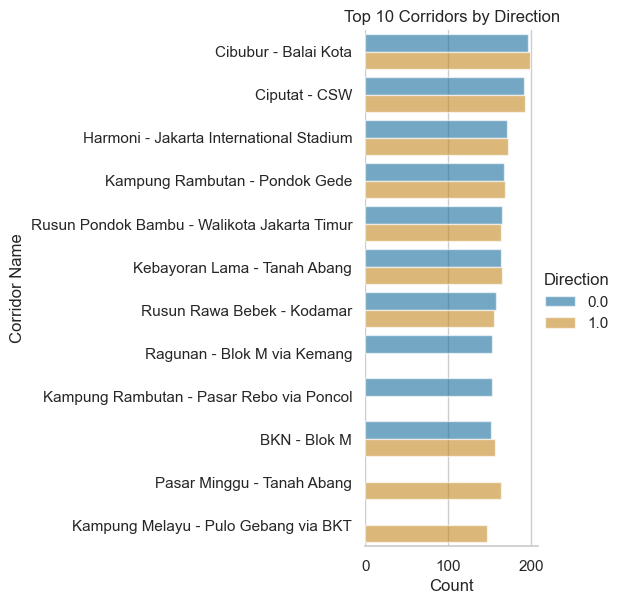

In [122]:
# Menggunakan seaborn untuk membuat barplot
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")

# Membuat plot
g = sns.catplot(
    data=top_10_corridors_per_direction, kind="bar",
    x="count", y="corridorName", hue="direction", palette=sns.color_palette("colorblind"), alpha=.6, height=6
)

g.despine(left=True)
g.set_axis_labels("Count", "Corridor Name")
g.legend.set_title("Direction")

plt.title('Top 10 Corridors by Direction')
plt.show()

__Insight__
- Koridor `Ragunan - Blok M via Kemang (6N)` dan `Kampung Rambutan - Pasar Rebo via Poncol (JAK.72)` memiliki frequency yang tinggi di arah pergi saja.	 
- Koridor `Pasar Minggu - Tanah Abang(9D)` dan `Kampung Melayu - Pulo Gebang via BKT (11Q)` memiliki frequency yang tinggi di arah kembali saja. 
- Terdapat beberapa koridor yang kurang digunakan untuk perjalanan bolak-balik, karena pelanggan lebih banyak menggunakan rute lain yang berbeda. 

Selanjutnya mari melihat koridor yang paling tidak populer berdasarkan arah rute.

In [123]:
# Memilih 10 koridor terendah  untuk setiap arah
bottom_10_corridors_per_direction = corridor_counts.groupby('direction').tail(10)
bottom_10_corridors_per_direction.sort_values(by=['direction','count'],ascending=[True, True])

,direction,corridorID,corridorName,count
84,0.0,7B,Kampung Rambutan - Blok M,9
207,0.0,M5,Matraman Baru - Ancol,9
132,0.0,JAK.12,Tanah Abang - Kebayoran Lama via Pos Pengumben,10
39,0.0,1R,Senen - Tanah Abang,18
48,0.0,2Q,Gondangdia - Balai Kota,18
176,0.0,JAK.53,Grogol - Pos Pengumben via Slipi,19
195,0.0,JAK.99,Term. Pulo Gadung - Lampiri,20
89,0.0,7P,Pondok Kelapa - BKN,24
9,0.0,11C,Rusun Pinus Elok - Rusun Pulo Gebang,25
75,0.0,6M,Stasiun Manggarai - Blok M,27


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18296\694772308.py:6: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



<Figure size 2000x1000 with 0 Axes>

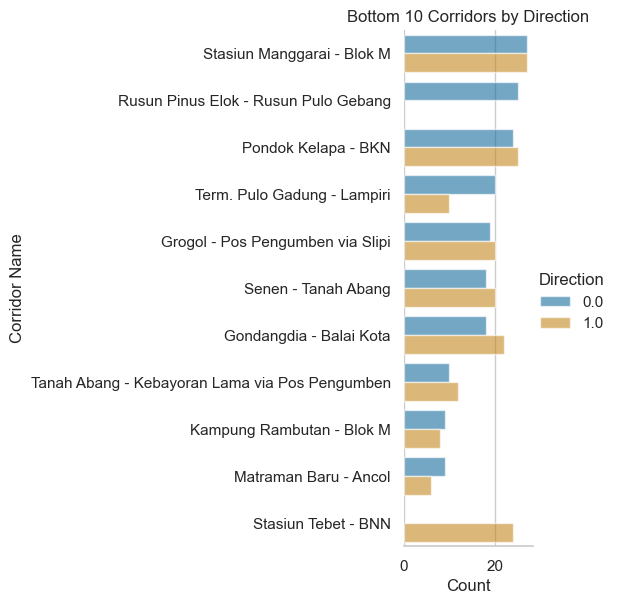

In [124]:
# Menggunakan seaborn untuk membuat barplot
plt.figure(figsize=(20, 10))
sns.set_theme(style="whitegrid")

# Membuat plot
g = sns.catplot(
    data=bottom_10_corridors_per_direction, kind="bar",
    x="count", y="corridorName", hue="direction", palette=sns.color_palette("colorblind"), alpha=.6, height=6
)

g.despine(left=True)
g.set_axis_labels("Count", "Corridor Name")
g.legend.set_title("Direction")

plt.title('Bottom 10 Corridors by Direction')
plt.show()

__Insight__

- Koridor-koridor pada 10 terbawah yang ada, menunjukkan frekuensi transaksi yang cenderung rendah.
- Dapat terlihat pula bahwa beberapa koridor memiliki aktivitas yang proporsinya berbeda signifikan antara rute pergi dan kembali.

##### __4.1.8. 10 Halte `Masuk` Terpopuler__

Sekarang, mari menganalisis kolom `tapInStops` dan `tapInStopsName` untuk menjawab pertanyaan berikut,
1. Apa saja 10 halte masuk yang paling populer berdasarkan frekuensi transaksinya dalam sebulan.

In [125]:
# Mapping untuk mengisi nama 'tapInStops' yang kosong
in_id = list(df['tapInStops'])
in_name = list(df['tapInStopsName'])
mapping_inid = dict(zip(in_id,in_name))         #membuat kategori mapping 

In [126]:
# Mencari Top 10 tapInStops
top10('tapInStops','tapInStopsName',mapping_inid).sort_values(ascending=False, by= 'numOfCust')['IDName']

0           Penjaringan (P00170)
1     Garuda Taman Mini (P00064)
2                   BKN (P00016)
3               BNN LRT (P00297)
4               Pejaten (P00164)
5          Penggilingan (P00169)
6     Cibubur Junction (B00248P)
7    Rusun Kapuk Muara (B03277P)
8               Seskoal (P00221)
9               Tendean (P00254)
Name: IDName, dtype: object

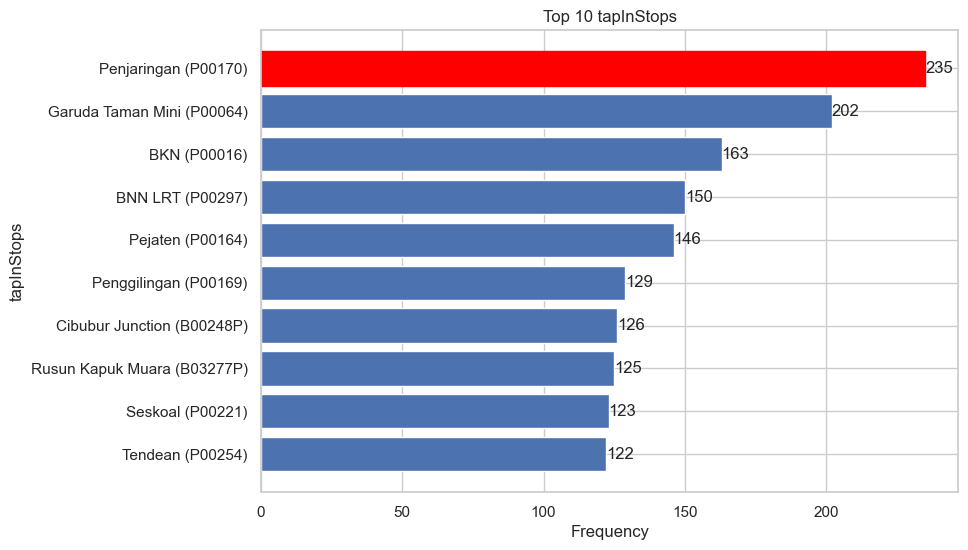

In [127]:
# Membuat grafik
barh_top10(top10('tapInStops','tapInStopsName',mapping_inid),'IDName','numOfCust','tapInStops')

Halte penjaringan (P00170) memiliki transaksi lebih besar dua kali lipat dari Tendean (P00254). Ini menunjukkan bahwa, aktivitas transaksi di Penjaringan cukup tinggi dan ramai pada bulan April ini. Mari kita hitung halte yang paling populer berdasarkan kepadatan halte perjamnya.

In [128]:
# Hitung kepadatan per jam untuk setiap koridor
df_stops_per_hour = df.groupby(['tapInStops','tapInStopsName','tapInHour'])[['transID']].count()

density_per_hour = df_stops_per_hour.groupby(['tapInStops','tapInStopsName','tapInHour']).agg({'transID': 'sum'}).reset_index()

# Hitung kepadatan rata-rata per jam untuk setiap koridor
avg_density_per_stops = density_per_hour.groupby(['tapInStops','tapInStopsName']).agg({'transID': 'mean'}).reset_index()

# Dapatkan 10 koridor teratas berdasarkan kepadatan rata-rata per jam
top_10_stops_per_hour = avg_density_per_stops.nlargest(10, 'transID')
top_10_stops_per_hour

,tapInStops,tapInStopsName,transID
710,B02048P,Komplek Kodam Jaya Kb. Jeruk,19.500000
1250,B03395P,Pal Batu 3,18.500000
2308,P00064,Garuda Taman Mini,18.363636
2449,P00224,Slamet Riyadi,15.500000
515,B01437P,Jln. Palatehan,14.750000
2400,P00170,Penjaringan,14.687500
618,B01795P,Kalibata City 2,13.666667
606,B01762P,Jembatan Pintu Satu,13.333333
1059,B02940P,Pool Express Tanah Kusir,13.333333
2480,P00258,Tipar Cakung,13.000000


Ternyata, pada bulan April ini Komplek Kodam Jaya Kb. Jeruk	(B02048P), merupakan halter terpadat dengan rata-rata 20 transaksi perjamnya. 

In [129]:
# Filter DataFrame df berdasarkan nama perhentian
filtered_df = df.loc[df['tapInStopsName'].isin(['Penjaringan','Garuda Taman Mini','BKN', 'BNN LRT', 'Pejaten','Penggilingan','Cibubur Junction','Rusun Kapuk Muara','Seskoal','Tendean'])]

# Pilih kolom yang diinginkan dan hapus duplikat
unique_stops_info_freq = filtered_df[['tapInStopsName', 'tapInStops', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates()
unique_stops_info_freq

,tapInStopsName,tapInStops,tapInStopsLat,tapInStopsLon
11,Tendean,P00254,-6.240213,106.831020
45,Garuda Taman Mini,P00064,-6.290154,106.881160
66,Penjaringan,P00170,-6.126306,106.792030
86,Penggilingan,P00169,-6.214132,106.939610
146,Cibubur Junction,B00248P,-6.368735,106.893660
170,BNN LRT,P00297,-6.245863,106.871143
197,Rusun Kapuk Muara,B03277P,-6.135667,106.762990
205,BKN,P00016,-6.257751,106.870000
259,Pejaten,P00164,-6.278404,106.829720
12106,Seskoal,P00221,-6.238064,106.771210


Mari memasukkan informasi halte populer dan terpadat ini ke dalam peta.

In [130]:
# Filter DataFrame df berdasarkan nama perhentian
filtered_df = df.loc[df['tapInStopsName'].isin(['Penjaringan','Garuda Taman Mini','BKN', 'BNN LRT', 'Pejaten','Penggilingan','Cibubur Junction','Rusun Kapuk Muara','Seskoal','Tendean'])]

# Pilih kolom yang diinginkan dan hapus duplikat
unique_stops_info_freq = filtered_df[['tapInStopsName', 'tapInStops', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates()
unique_stops_info_freq

,tapInStopsName,tapInStops,tapInStopsLat,tapInStopsLon
11,Tendean,P00254,-6.240213,106.831020
45,Garuda Taman Mini,P00064,-6.290154,106.881160
66,Penjaringan,P00170,-6.126306,106.792030
86,Penggilingan,P00169,-6.214132,106.939610
146,Cibubur Junction,B00248P,-6.368735,106.893660
170,BNN LRT,P00297,-6.245863,106.871143
197,Rusun Kapuk Muara,B03277P,-6.135667,106.762990
205,BKN,P00016,-6.257751,106.870000
259,Pejaten,P00164,-6.278404,106.829720
12106,Seskoal,P00221,-6.238064,106.771210


In [131]:
# Filter DataFrame df berdasarkan nama perhentian
filtered_df = df.loc[df['tapInStopsName'].isin(top_10_stops_per_hour['tapInStopsName'])]

# Pilih kolom yang diinginkan dan hapus duplikat
unique_stops_info_hour = filtered_df[['tapInStopsName', 'tapInStops', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates()
unique_stops_info_hour

,tapInStopsName,tapInStops,tapInStopsLat,tapInStopsLon
45,Garuda Taman Mini,P00064,-6.290154,106.881160
66,Penjaringan,P00170,-6.126306,106.792030
149,Slamet Riyadi,P00224,-6.208533,106.859290
311,Kalibata City 2,B01795P,-6.255816,106.852370
333,Jembatan Pintu Satu,B01762P,-6.300382,106.883630
377,Komplek Kodam Jaya Kb. Jeruk,B02048P,-6.197819,106.770970
388,Tipar Cakung,P00258,-6.183387,106.924630
410,Pal Batu 3,B03395P,-6.225075,106.841490
418,Pool Express Tanah Kusir,B02940P,-6.255345,106.769110
12312,Jln. Palatehan,B01437P,-6.240057,106.800758


In [132]:
jakarta_map = folium.Map(
    location=[-6.200000, 106.816666],
    zoom_start = 10
)

for index, data in unique_stops_info_hour.iterrows():
    top10_stopin_hour = folium.Marker(
        location=[data['tapInStopsLat'], data['tapInStopsLon']],
        tooltip=f"Top 10 Halte Masuk Terpadat<br>{data['tapInStopsName']}",
        popup=folium.Popup(f"{data['tapInStopsName']}<br>{data['tapInStops']}", max_width=300),
        icon=folium.Icon(
            color='blue',
            icon='info-sign',
            icon_color='black'
        )
    )
    top10_stopin_hour.add_to(jakarta_map)

for index, data in unique_stops_info_freq.iterrows():
    top10_stopin_hour = folium.Marker(
        location=[data['tapInStopsLat'], data['tapInStopsLon']],
        tooltip=f"Top 10 Halte Masuk Favorit Bulan April<br>{data['tapInStopsName']}",
        popup=folium.Popup(f"{data['tapInStopsName']}<br>{data['tapInStops']}", max_width=300),
        icon=folium.Icon(
            color='orange',
            icon='info-sign',
            icon_color='black'
        )
    )
    top10_stopin_hour.add_to(jakarta_map)
jakarta_map

__Insight__

- Halte yang kepadatannya tinggi cenderung terletak di pinggiran kota Jakarta.
- Sementara halte yang populer pada bulan April di dominasi oleh halte-halte yang terletak di daerah perkantoran dan perusahaan.

##### __4.1.9. 10 Halte `Keluar` Terpopuler__

Sekarang, mari menganalisis kolom `tapOutStops` dan `tapOutStopsName` untuk menjawab pertanyaan berikut,
1. Apa saja 10 halte keluar yang paling populer berdasarkan frekuensi transaksinya dalam sebulan.

In [133]:
# Mapping untuk mengisi nama 'tapInStops' yang kosong
in_id = list(df['tapOutStops'])
in_name = list(df['tapOutStopsName'])
mapping_inid = dict(zip(in_id,in_name))         #membuat kategori mapping 

In [134]:
top10('tapOutStops','tapOutStopsName',mapping_inid)

,IDName,numOfCust
8,Kota Kasablanka (B03396P),131
9,Tendean (P00254),131
7,Pinang Ranti (P00179),145
6,Ragunan (P00199),150
5,Kejaksaan Agung (P00112),159
4,Term. Kampung Rambutan (B05708P),164
3,Monas (P00137),167
2,Term. Senen (B05725P),196
1,Penjaringan (P00170),265
0,BKN (P00016),315


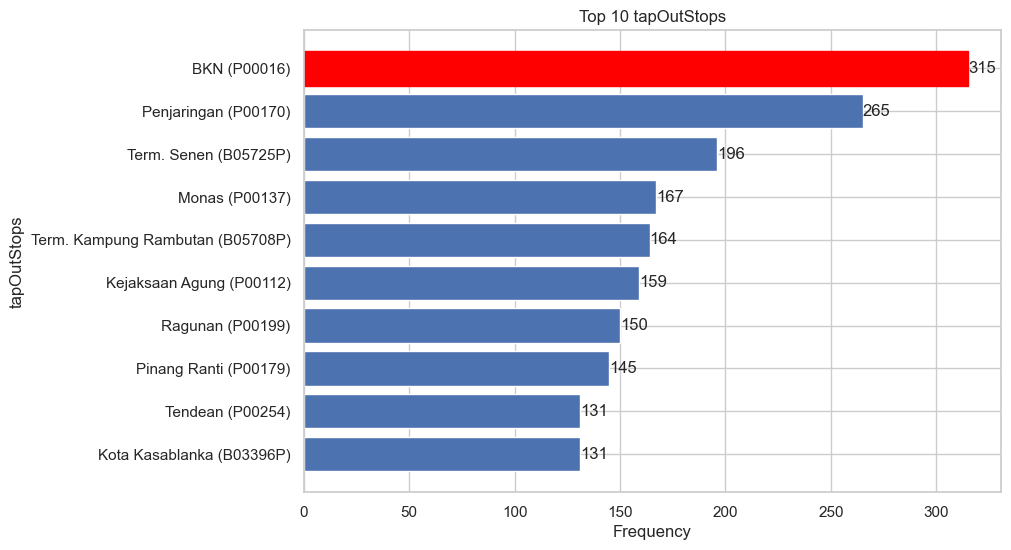

In [135]:
# Membuat grafik
barh_top10(top10('tapOutStops','tapOutStopsName',mapping_inid),'IDName','numOfCust','tapOutStops')

Halte BKN (P00016) memiliki transaksi lebih besar hampir tiga kali lipat dari Kota Kasablanka (B03396P). Ini menunjukkan bahwa, aktivitas transaksi di BKN cukup tinggi dan ramai pada bulan April ini. Mari kita hitung halte yang paling populer berdasarkan kepadatan halte perjamnya.

In [136]:
# Hitung kepadatan per jam untuk setiap koridor
df_cor_per_hour = df.groupby(['tapOutStops','tapOutStopsName', 'tapOutHour'])[['transID']].count()

density_per_hour = df_cor_per_hour.groupby(['tapOutStops','tapOutStopsName','tapOutHour']).agg({'transID': 'sum'}).reset_index()

# Hitung kepadatan rata-rata per jam untuk setiap koridor
avg_density_per_corridor = density_per_hour.groupby(['tapOutStops','tapOutStopsName']).agg({'transID': 'mean'}).reset_index()

# Dapatkan 10 koridor teratas berdasarkan kepadatan rata-rata per jam
top_10_stops_per_hour = avg_density_per_corridor.nlargest(10, 'transID')
top_10_stops_per_hour

,tapOutStops,tapOutStopsName,transID
1973,P00016,BKN,18.529412
2104,P00170,Penjaringan,15.588235
2045,P00102,Kampung Sumur,15.000000
659,B02195P,Mall Taman Palem 3,13.000000
1984,P00029,Cawang Ciliwung Arah Barat,13.000000
1656,B05622P,Taman Margahayu 2,12.666667
1804,B06067P,Sunter Muara 1,12.666667
1685,B05708P,Term. Kampung Rambutan,12.615385
1694,B05725P,Term. Senen,10.888889
1030,B03277P,Rusun Kapuk Muara,10.636364


Sekitar 19 pelanggan per jamnya yang keluar di halte BKN (P00016) dalam bulan April ini. Mari kita lihat lebih jelas dengan menggunakan map.

In [137]:
# Filter DataFrame df berdasarkan nama perhentian
filtered_df = df.loc[df['tapOutStopsName'].isin(['Kota Kasablanka','Tendean', 'Pinang Ranti', 'Ragunan', 'Kejaksaan Agung', 'Term. Kampung Rambutan','Monas','Term. Senen','Penjaringan','BKN'])]

# Pilih kolom yang diinginkan dan hapus duplikat
unique_stopsout_info_freq = filtered_df[['tapOutStopsName', 'tapOutStops', 'tapOutStopsLat', 'tapOutStopsLon']].drop_duplicates()
unique_stopsout_info_freq

,tapOutStopsName,tapOutStops,tapOutStopsLat,tapOutStopsLon
39,Monas,P00137,-6.176248,106.82286
45,BKN,P00016,-6.257751,106.87000
98,Term. Senen,B05725P,-6.173560,106.84213
197,Penjaringan,P00170,-6.126306,106.79203
240,Kota Kasablanka,B03396P,-6.224688,106.84246
311,Tendean,P00254,-6.240213,106.83102
322,Ragunan,P00199,-6.305769,106.81949
433,Pinang Ranti,P00179,-6.291075,106.88634
12059,Kejaksaan Agung,P00112,-6.240500,106.79844
12070,Term. Kampung Rambutan,B05708P,-6.308964,106.88165


In [138]:
# Filter DataFrame df berdasarkan nama perhentian
filtered_df = df.loc[df['tapOutStopsName'].isin(top_10_stops_per_hour['tapOutStopsName'])]

# Pilih kolom yang diinginkan dan hapus duplikat
unique_stopsout_info_hour = filtered_df[['tapOutStopsName', 'tapOutStops', 'tapOutStopsLat', 'tapOutStopsLon']].drop_duplicates()
unique_stopsout_info_hour

,tapOutStopsName,tapOutStops,tapOutStopsLat,tapOutStopsLon
27,Mall Taman Palem 3,B02195P,-6.140548,106.73011
45,BKN,P00016,-6.257751,106.87000
66,Rusun Kapuk Muara,B03277P,-6.135667,106.76299
68,Taman Margahayu 2,B05622P,-6.248460,107.02153
98,Term. Senen,B05725P,-6.173560,106.84213
197,Penjaringan,P00170,-6.126306,106.79203
333,Cawang Ciliwung Arah Barat,P00029,-6.243292,106.86359
375,Sunter Muara 1,B06067P,-6.144331,106.85745
386,Kampung Sumur,P00102,-6.214412,106.91189
12070,Term. Kampung Rambutan,B05708P,-6.308964,106.88165


In [139]:
jakarta_map = folium.Map(
    location=[-6.200000, 106.816666],
    zoom_start = 10
)

for index, data in unique_stopsout_info_hour.iterrows():
    top10_stopin_hour = folium.Marker(
        location=[data['tapOutStopsLat'], data['tapOutStopsLon']],
        tooltip=f"Top 10 Halte Keluar Terpadat<br>{data['tapOutStopsName']}",
        popup=folium.Popup(f"{data['tapOutStopsName']}<br>{data['tapOutStops']}", max_width=300),
        icon=folium.Icon(
            color='blue',
            icon='info-sign',
            icon_color='black'
        )
    )
    top10_stopin_hour.add_to(jakarta_map)

for index, data in unique_stopsout_info_freq.iterrows():
    top10_stopin_hour = folium.Marker(
        location=[data['tapOutStopsLat'], data['tapOutStopsLon']],
        tooltip=f"Top 10 Halte Keluar Favorit Bulan April<br>{data['tapOutStopsName']}",
        popup=folium.Popup(f"{data['tapOutStopsName']}<br>{data['tapOutStops']}", max_width=300),
        icon=folium.Icon(
            color='orange',
            icon='info-sign',
            icon_color='black'
        )
    )
    top10_stopin_hour.add_to(jakarta_map)
jakarta_map

__Insight__
- Halte keluar yang populer di dominasi dengan halte yang terletak di kota Jakarta.
- sementara halte keluar yang padat, cenderung berada di luar kota Jakarta.

##### __4.1.10. Aktivitas Transaksi berdasarkan Waktu (Jam, Hari, Tanggal)__

Mari menganalisis kolom `tapInHour` dan `tapOutHour` menjawab pertanyaan,
1. Pukul berapakah waktu dengan aktivitas tertinggi?

In [140]:
# Menghitung frekuensi kemunculan setiap jam untuk tapInHour
hourly_countIn = df['tapInHour'].value_counts().sort_index().reset_index()
hourly_countIn.columns = ['hour', 'frequency']

# Menghitung frekuensi kemunculan setiap jam untuk tapOutHour
hourly_countOut = df['tapOutHour'].value_counts().sort_index().reset_index()
hourly_countOut.columns = ['hour', 'frequency']

In [141]:
# Membuat plot interaktif
fig = px.line(hourly_countIn, x='hour', y='frequency', title='Transaction Frequency of Each Hour in 24 Hours')
fig.add_scatter(x=hourly_countIn['hour'], y=hourly_countIn['frequency'], mode='lines+markers', name='Tap In Hour')
fig.add_scatter(x=hourly_countOut['hour'], y=hourly_countOut['frequency'], mode='lines+markers', name='Tap Out Hour')

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(24)),
        title='Hour of Day'
 ),
    yaxis=dict(
        title='Frequency'
    ),
    legend_title_text='Legend',
)

fig.show()

__Insight__
- Dalam bulan April 2023, puncak aktivitas masuk `tapIn` paling tinggi terjadi pada pk 6.00 dan pk 17.00 kemudian diikuti dengan kemudian penurunan dalam 1 jam setelahnya.
- Sementara puncak `tapOut` atau keluar halte pada pk 7.00 dan pk 18.00. 
- Aktivitas transaksi cenderung rendah pada pk 10.00 hingga pk 16.00.

In [142]:
# Menghitung frekuensi kemunculan setiap hari untuk 
daily_countIn = df['dayIn'].value_counts().sort_index().reset_index()
daily_countIn.columns = ['day', 'frequency']

# Membuat plot interaktif
fig = px.line(daily_countIn, x='day', y='frequency', title='Transaction Frequency of Each Day')
fig.add_scatter(x=daily_countIn['day'], y=daily_countIn['frequency'], mode='lines+markers', name='Tap In Day')

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(24)),
        title='Days'
 ),
    yaxis=dict(
        title='Frequency'
    ),
    legend_title_text='Legend',
)

fig.show()

Pada hari Sabtu dan Minggu transaksi cenderung menurun.

In [143]:
# Menghitung frekuensi transaksi secara general
daily_countIn = df['dateIn'].value_counts().sort_index().reset_index()
daily_countIn.columns = ['dateIn', 'frequency']

# Membuat plot interaktif
fig = px.line(daily_countIn, x='dateIn', y='frequency', title='Transaction Frequency of Each Dates')
fig.add_scatter(x=daily_countIn['dateIn'], y=daily_countIn['frequency'], mode='lines+markers', name='General')

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=daily_countIn['dateIn'],
        ticktext=[date.strftime('%A, %d') for date in daily_countIn['dateIn']],
        title='Dates'
 ),
    yaxis=dict(
        title='Frequency'
    ),
    legend_title_text='Legend',
)

fig.show()

__Insight__
- Pada hari Sabtu dan Minggu, aktivitas transaksi cenderung menurun.
- Sementara, pada hari Senin - Jumat penggunaan Transjakarta, cenderung tinggi.
- Dari grafik, ditemukan bahwa pada tanggal 13 - 14 April dan 17 - 19 April, merupakan puncak frekuensi transaksi di bulan April dan hal tersebut tidak biasa.
- Pada tanggal terebut ditemukan bahwa terjadi arus mudik yang tinggi, sehingga penggunaan Transjakarta meningkat.  Mari kita telaah lebih lanjut dengan melihat aktivitas pada tanggal tersebut berdasarkan RFM level.

In [144]:
import plotly.express as px
import plotly.graph_objects as go

# Group by 'dateIn' dan 'rfm_level' to calculate frequency
daily_countIn = df.groupby(['dateIn', 'rfm_level']).size().reset_index(name='frequency')

# Create initial figure
fig = px.line(daily_countIn, x='dateIn', y='frequency', color='rfm_level', 
              title='Transaction Frequency of Each Date by RFM Level')

# Add markers
fig.add_scatter(x=daily_countIn['dateIn'], y=daily_countIn['frequency'], mode='markers', name='Frequency')

# Create dropdown menu
buttons = []
for rfm_level in daily_countIn['rfm_level'].unique():
    buttons.append(dict(
        label=rfm_level,
        method='update',
        args=[{'visible': [rfm_level == trace.name for trace in fig.data]}]
    ))

# Add 'All' button
buttons.append(dict(
    label='All',
    method='update',
    args=[{'visible': [True] * len(fig.data)}]
))

# Update layout to add dropdown menu
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=buttons
    )],
    xaxis=dict(
        tickmode='array',
        tickvals=daily_countIn['dateIn'],
        ticktext=[date.strftime('%A, %d') for date in daily_countIn['dateIn']],
        title='Dates'
    ),
    yaxis=dict(
        title='Frequency'
    ),
    legend_title_text='Traveler Frequency Group',
)

fig.show()



__Insight__
- "Best Customers" menggunakan Transjakarta setiap hari pada bulan April dan cenderung stagnan.
- "Loyal Customers" mendominasi Transjakarta setiap _weekdays_ pada bulan April. Artinya sudah menjadi sebuah kebiasaan untuk beraktivitas seperti, bekerja, sekolah dengan menggunakan Transjakarta.
- "Occasional Customers" paling aktif antara tanggal 13-19 April dan mengalami kenalkan frekuensi setiap _weekend_. Artinya, pelanggan menggunakan Transkjakarta ketika ada kegiatan tertentu. Pada kasus "Occasional Customers", mereka menggunakan ketika hari libur atau libur panjang sebagai moda transportasi pilihan.
- Sama halnya dengan "At Risk Customer", mereka juga menggunakan Transjakarta ketika _weekend_ dan memuncak ketika tanggal 13-19 April.

##### __4.1.11. Pendapatan berdasarkan payAmount__

Mari menganalisis kolom `payAmount` untuk memperoleh informasi mengenai

1. Berapakah total pendapatan Transjakarta dalam sebulan?
2. Berapakah rata-rata pendapatan hariannya?

In [145]:
# Menghitung persentase perbedaan

pay_daily = df.pivot_table(
    index = 'dateIn',
    values = 'payAmount',
    aggfunc = 'mean'
).reset_index()

pay_daily['percent_diff'] = pay_daily['payAmount'].pct_change() * 100

# Membuat line chart
fig = px.line(pay_daily, x='dateIn', y='payAmount', title="Transjakarta's Daily Payment Amount Mean in April 2023")

# Menambahkan anotasi persentase perbedaan dengan penyesuaian posisi
for i in range(1, len(pay_daily)):
    fig.add_annotation(
        x=pay_daily['dateIn'][i],
        y=pay_daily['payAmount'][i],
        text=f"{pay_daily['percent_diff'][i]:.2f}%",
        showarrow=True,
        arrowhead=2,
        ax=0,
        ay=(-1)**i * 40  # Penyesuaian posisi secara bergantian atas dan bawah
    )

# Menambahkan label dan memperbarui layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Transaction payAmount Mean',
    legend_title_text='Payment Amount',
    xaxis=dict(tickmode='linear', tickformat='%A,%d', tickvals=pay_daily['dateIn'])
)

fig.show()

__Insight__

- Rata-rata pendapatan pada 29 April, menurun drastis. Tanggal 29 April 2023 merupakan hari libur Lebaran. Pada hari itu, mobilitas pelanggan menurun untuk merayakan hari raya.



##### __4.1.12. Rata-rata Durasi Perjalanan__

Mari kita perikasa rata-rata durasi perjalanan dengan kolom `travelDuration` sambil menjawab pertanyaan berikut;
1. Durasi terpanjang perjalanan dialami ketika melewati koridor dan halte apa?

In [146]:
# Menghitung rata-rata durasi perjalanan dan jumlah perhentian berdasarkan direction dan corridor
avg_duration_inout = df.groupby(['direction', 'corridorID', 'corridorName','tapInStops','tapInStopsName','tapOutStops','tapOutStopsName','stopsRange'])['travelDuration'].median().reset_index()
avg_duration_inout.columns = ['direction', 'corridorID', 'corridorName', 'tapInStops','tapInStopsName','tapOutStops','tapOutStopsName','MedianStopsRange', 'MedianTravelDuration']

# Fungsi konversi menit ke format jam:menit:detik
def minutes_to_hms(minutes):
    total_seconds = minutes * 60
    hours = int(total_seconds // 3600)
    remaining_seconds = total_seconds % 3600
    mins = int(remaining_seconds // 60)
    secs = remaining_seconds % 60
    return f'{hours:02}:{mins:02}:{secs:06.3f}'

# Menambahkan kolom durasi dalam format jam:menit:detik
avg_duration_inout['MedianTravelDuration_inHour'] = avg_duration_inout['MedianTravelDuration'].apply(lambda x: minutes_to_hms(x))

# Mengambil data durasi tertinggi dan terendah untuk masing-masing direction
highest_duration_per_direction = avg_duration_inout.loc[avg_duration_inout.groupby('direction')['MedianTravelDuration'].idxmax()]
lowest_duration_per_direction = avg_duration_inout.loc[avg_duration_inout.groupby('direction')['MedianTravelDuration'].idxmin()]

# Menampilkan hasil
print("Data dengan durasi tertinggi untuk masing-masing arah:")
display(highest_duration_per_direction)

print("\nData dengan durasi terendah untuk masing-masing arah:")
display(lowest_duration_per_direction)

Data dengan durasi tertinggi untuk masing-masing arah:


,direction,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName,MedianStopsRange,MedianTravelDuration,MedianTravelDuration_inHour
1123,0.0,D32,Cinere - Bundaran Senayan,B06642P,Mega Cinere,B00378P,FX Sudirman,3.0,179.05,02:59:03.000
2296,1.0,10K,Tanjung Priok - Senen via Taman BMW,B03729P,Sbr. Jln. H. Ung,B01745P,Jembatan Item,12.0,179.05,02:59:03.000



Data dengan durasi terendah untuk masing-masing arah:


,direction,corridorID,corridorName,tapInStops,tapInStopsName,tapOutStops,tapOutStopsName,MedianStopsRange,MedianTravelDuration,MedianTravelDuration_inHour
15,0.0,10,Tanjung Priok - PGC 2,P00166,Pemuda Pramuka,P00002,Ahmad Yani Bea Cukai,2.0,15.116667,00:15:07.000
2472,1.0,13C,Puri Beta - Dukuh Atas,P00242,Swadarma,P00001,Adam Malik,2.0,15.133333,00:15:08.000


__Insight__

- Aktivitas koridor Cinere - Bundaran Senayan (D32) masih terlihat kurang efektif karena durasi waktu yang sangat panjang, padahal memiliki perhentian yangg sedikit. 
- Sementara rute Tanjung Priok - Senen via Taman BMW (10K), menunjukkan bahwa memiliki rute yang lebih kompleks dengan durasi perjalanan yang sama dengan Cinere - Bundaran Senayan (D32).
- 	Tanjung Priok - PGC 2 (10) dan Puri Beta - Dukuh Atas (13C) sudah memiliki efisiensi yang baik dengan jumlah perhentian dan durasi perjalanan yang singkat.

__Rekomendasi__
- Koridor dengan durasi terpendek dapat menjadi referensi untuk membuat rute yang efisen.
- Koridor dengan durasi perjalanan yang lama harus dievaluasi untuk melakukan penyesuaian pada rute atau meningkatkan efisiensi waktu perhentian guna meningkatkan kenyamanan penumpang.

## __5. Inferential Statistic__
---


Mari melakukan pengujian untuk menganalisis hubungan antar variabel dalam dataset ini guna mengetahui adanya keterkaitan atau ketergantungan antara variabel-variabel tersebut serta memahami pola dan perbedaan yang mungkin ada di dalam data.

__Melakukan uji Normalitas pada variabel numerik__

In [147]:
from scipy.stats import normaltest

dist = []
numerical = [var for var in df.columns if pd.api.types.is_numeric_dtype(df[var])]
for i in range(len(numerical)):
    col = numerical[i]
    stat, p_value = normaltest(df[col])
    
    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"
    
    dist.append([col, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,payCardBirthDate,965.224579,2.535980e-210,Not Normally Distributed
1,direction,124429.318368,0.000000e+00,Not Normally Distributed
2,tapInStopsLat,486.045226,2.861675e-106,Not Normally Distributed
3,tapInStopsLon,399.983308,1.395495e-87,Not Normally Distributed
4,stopStartSeq,6887.599116,0.000000e+00,Not Normally Distributed
5,tapOutStopsLat,563.018053,5.523104e-123,Not Normally Distributed
6,tapOutStopsLon,265.769179,1.945164e-58,Not Normally Distributed
7,stopEndSeq,3168.845247,0.000000e+00,Not Normally Distributed
8,payAmount,23925.092459,0.000000e+00,Not Normally Distributed
9,age,965.224579,2.535980e-210,Not Normally Distributed


Seluruh kolom numerikal memiliki distribusi data tidak normal.

##### __5.1 Hubungan antara Variabel Numerik__

Uji korelasi dengan heatmap untuk memperoleh gambaran hubungan variabel-variabel numerik

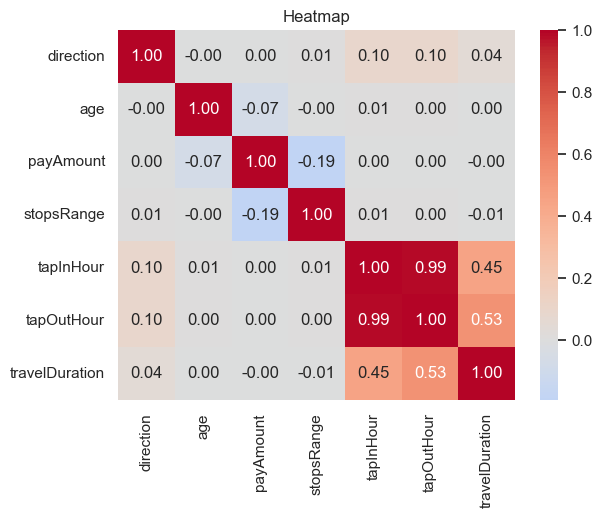

In [148]:
sns.heatmap(
    df[['direction','age','payAmount','stopsRange','tapInHour','tapOutHour','travelDuration']].corr(method='spearman', numeric_only=True),                 # data
    annot=True,                                 # anotasi
    fmt='.2f',                                  # format
    cmap='coolwarm',                            # warna
    center=0,                                   # pusat data
)

plt.title('Heatmap')

plt.show()

__Insight__

Hubungan antara variabel numerik lemah

#### __5.2 Hubungan antara Variabel Kategorikal__

##### __5.2.1 Hubungan Usia dengan Preferensi Koridor__

Pertanyaan yang ingin dijawab: Apakah kelompok usia berpengaruh terhadap preferensi koridor yang dipilih?

In [149]:
contingency_table = pd.crosstab(df['age_group'], df['corridorName'])
contingency_table

corridorName,Andara - Stasiun Universitas Pancasila,BKN - Blok M,BSD - Jelambar,BSD Serpong - Fatmawati,Batusari - Grogol,Bekasi Barat - Blok M,Bekasi Barat - Kuningan,Bekasi Timur - Cawang,Bintara - Cipinang Indah,Bintaro - Blok M,...,Term. Rawamangun - Term. Manggarai,Term. Tj. Priok - Pegangsaan II IGI,Terminal Kalideres - Terminal Muara Angke,Terminal Kampung Melayu - Kapin Raya,Terminal Kampung Melayu - Terminal Klender,Terminal Rawamangun - Cipinang Muara,Terminal Tanah Merah - Pulo Gadung,Terminal Tanjung Priok - Ancol Barat,Tongtek - Tebet Eco Park (TEP) - Cililitan,Universitas Indonesia - Lebak Bulus
age_group,,,,,,,,,,,,,,,,,,,,,
<19,0,77,0,40,80,2,4,1,3,1,...,77,1,3,2,4,39,41,5,2,39
20-39,119,174,121,46,169,86,219,159,95,90,...,71,88,48,87,23,89,143,59,84,87
40-59,117,43,2,4,3,39,4,57,40,79,...,41,42,17,1,90,78,79,132,82,59
>60,0,14,0,2,0,0,0,0,0,0,...,0,1,0,2,2,0,1,0,0,0


In [150]:
# Lakukan uji Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Tampilkan hasil uji Chi-square
print("\nHasil Uji Chi-square:")
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print("\nAda cukup bukti untuk mengatakan bahwa terdapat hubungan yang signifikan antara usia dan preferensi koridor (tolak H0).")
else:
    print("\nTidak ada cukup bukti unutk mengatakan bahwa ada hubungan yang signifikan antara usia dan preferensi koridor (gagal tolak H0).")


Hasil Uji Chi-square:
Chi2: 19048.875180529267
p-value: 0.0
Degrees of freedom: 645

Ada cukup bukti untuk mengatakan bahwa terdapat hubungan yang signifikan antara usia dan preferensi koridor (tolak H0).


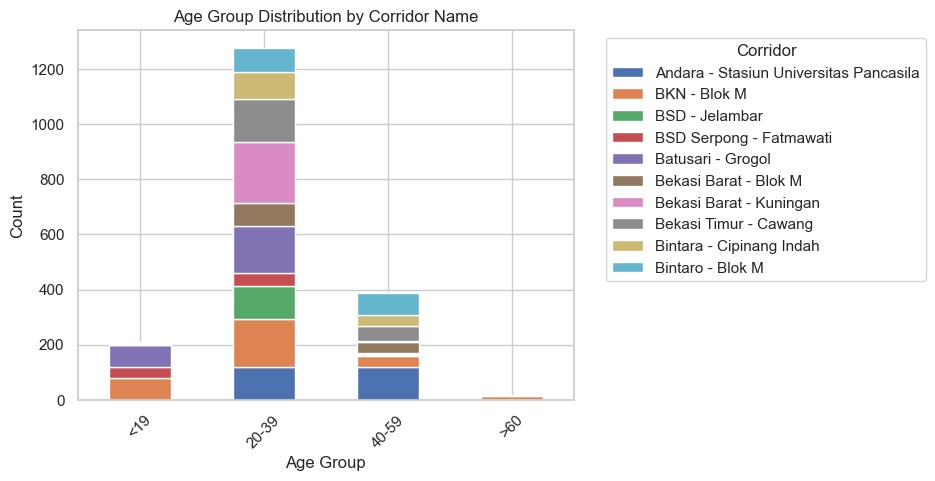

In [151]:
# Plotting the crosstab data
contingency_table.iloc[:, :10].plot(kind='bar', stacked=True)
plt.title('Age Group Distribution by Corridor Name')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Corridor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

__Insight__

- Kelompok usia memiliki preferensi koridor yang berbeda. Contohnya dalam grafik di atas, Koridor Bekasi Barat - Kuningan didominasi oleh kelompok usia 20-39 tahun.
- Sementara kelompok usia 40-59 tahun tidak menunjukkan aktivitas transaksi di koridor BSD Serpong - Fatmawati

##### __5.2.2. Hubungan Usia dengan Preferensi Kartu__

1. Apakah preferensi kartu berhubungan dengan kelompok usia?

In [152]:
contingency_table_age_card = pd.crosstab(df['age_group'], df['payCardBank'])
contingency_table_age_card

payCardBank,bni,brizzi,dki,emoney,flazz,online
age_group,,,,,,
<19,524,490,2572,1458,432,430
20-39,1453,1790,10097,3284,1792,1535
40-59,587,1058,4873,1794,785,744
>60,9,53,459,78,93,52


In [153]:
# Lakukan uji Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table_age_card)

# Tampilkan hasil uji Chi-square
print("\nHasil Uji Chi-square:")
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print("\nAda hubungan yang signifikan antara usia dan preferensi bank (tolak H0).")
else:
    print("\nTidak ada hubungan yang signifikan antara usia dan preferensi bank (gagal tolak H0).")


Hasil Uji Chi-square:
Chi2: 414.3139308050951
p-value: 6.768043531207352e-79
Degrees of freedom: 15

Ada hubungan yang signifikan antara usia dan preferensi bank (tolak H0).


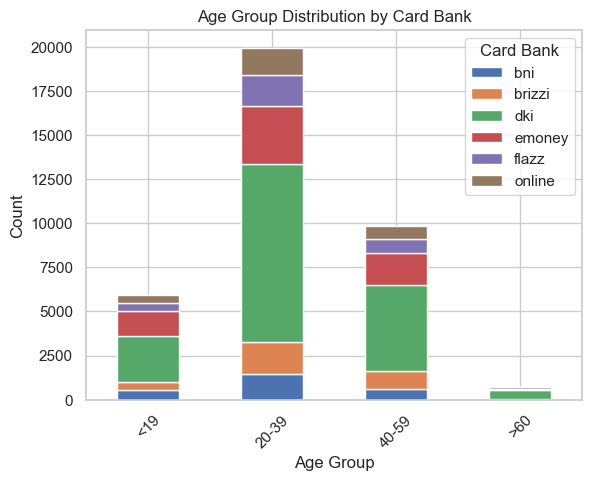

In [154]:
# Plotting the crosstab data
contingency_table_age_card.plot(kind='bar', stacked=True)
plt.title('Age Group Distribution by Card Bank')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Card Bank')
plt.xticks(rotation=45)
plt.show()

__Insight__

- Kartu dki cenderung digunakan oleh semua kalangan usia, 
- Namun usia >60 lebih memilih menggunakan kartu dki daripada kartu lainnya.

##### __5.2.3. Hubungan Jenis Kelamin dengan Preferensi Koridor__

1. Apakah Jenis kelamin berhubungan dengan preferensi koridor?

In [155]:
contingency_table_sex_cor = pd.crosstab(df['payCardSex'], df['corridorName'])
contingency_table_sex_cor

corridorName,Andara - Stasiun Universitas Pancasila,BKN - Blok M,BSD - Jelambar,BSD Serpong - Fatmawati,Batusari - Grogol,Bekasi Barat - Blok M,Bekasi Barat - Kuningan,Bekasi Timur - Cawang,Bintara - Cipinang Indah,Bintaro - Blok M,...,Term. Rawamangun - Term. Manggarai,Term. Tj. Priok - Pegangsaan II IGI,Terminal Kalideres - Terminal Muara Angke,Terminal Kampung Melayu - Kapin Raya,Terminal Kampung Melayu - Terminal Klender,Terminal Rawamangun - Cipinang Muara,Terminal Tanah Merah - Pulo Gadung,Terminal Tanjung Priok - Ancol Barat,Tongtek - Tebet Eco Park (TEP) - Cililitan,Universitas Indonesia - Lebak Bulus
payCardSex,,,,,,,,,,,,,,,,,,,,,
F,156,177,43,84,134,46,181,60,61,43,...,148,48,63,82,6,86,201,61,84,82
M,80,131,80,8,118,81,46,157,77,127,...,41,84,5,10,113,120,63,135,84,103


In [156]:
# Lakukan uji Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table_sex_cor)

# Tampilkan hasil uji Chi-square
print("\nHasil Uji Chi-square:")
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print("\nAda cukup bukti untuk mengatakan ada hubungan yang signifikan antara jenis kelamin dan preferensi koridor (tolak H0).")
else:
    print("\nTidak ada cukup bukti untuk mengatakan bahwa ada hubungan yang signifikan antara jenis kelamin dan preferensi koridor (gagal tolak H0).")


Hasil Uji Chi-square:
Chi2: 7405.569338279784
p-value: 0.0
Degrees of freedom: 215

Ada cukup bukti untuk mengatakan ada hubungan yang signifikan antara jenis kelamin dan preferensi koridor (tolak H0).


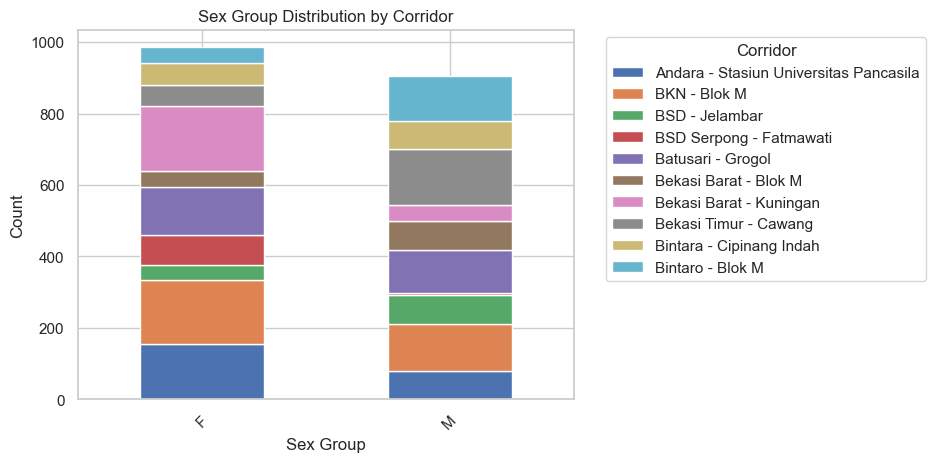

In [157]:
# Plotting the crosstab data
contingency_table_sex_cor.iloc[:,:10].plot(kind='bar', stacked=True)
plt.title('Sex Group Distribution by Corridor')
plt.xlabel('Sex Group')
plt.ylabel('Count')
plt.legend(title='Corridor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

__Insight__

- Wanita empat kali lebih banyak menggunakan Bekasi Barat - Kuningan daripada pria.
- Sementara pria tiga kali lebih banyak menggunakan koridor Bekasi Timur - Cawang
-hal ini menunjukkan bahwa preferensi koridor berhubungan dengan jenis kelamin

##### __5.2.4. Hubungan Jenis Kelamin dengan Preferensi Kartu__

In [158]:
contingency_table_sex_bank = pd.crosstab(df['payCardSex'], df['payCardBank'])
contingency_table_sex_bank

payCardBank,bni,brizzi,dki,emoney,flazz,online
payCardSex,,,,,,
F,1468,1750,9163,3916,1755,1347
M,1105,1641,8838,2698,1347,1414


In [159]:
# Lakukan uji Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table_sex_bank)

# Tampilkan hasil uji Chi-square
print("\nHasil Uji Chi-square:")
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print("\nAda hubungan yang signifikan antara jenis kelamin dan preferensi koridor (tolak H0).")
else:
    print("\nTidak ada hubungan yang signifikan antara jenis kelamin dan preferensi kartu (gagal tolak H0).")


Hasil Uji Chi-square:
Chi2: 188.64498159707128
p-value: 7.610925340840105e-39
Degrees of freedom: 5

Ada hubungan yang signifikan antara jenis kelamin dan preferensi koridor (tolak H0).


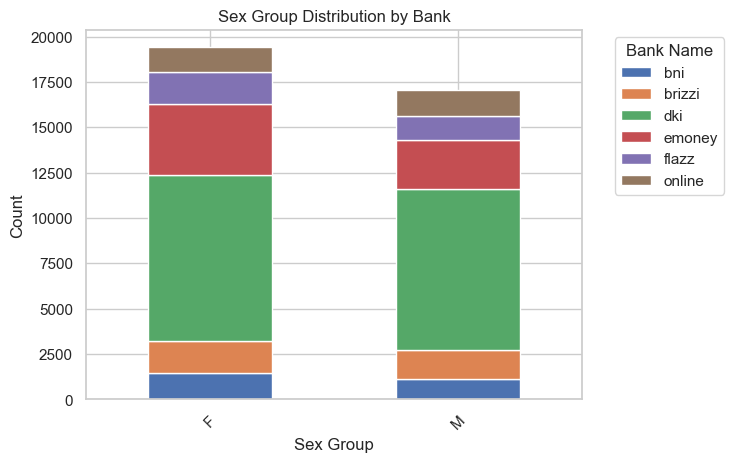

In [160]:
# Plotting the crosstab data
contingency_table_sex_bank.plot(kind='bar', stacked=True)
plt.title('Sex Group Distribution by Bank')
plt.xlabel('Sex Group')
plt.ylabel('Count')
plt.legend(title='Bank Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

##### __5.2.5. Preferensi tiap RFM Level__

Pada bagian ini saya ingin menjawab pertanyaan mengenai hubungan RFM Level dengan prefereni pilihan Koridor dan kartu yang dipilih oleh pelanggan

`Koridor`


Hasil Uji Chi-square:
Chi2: 24875.43614012678
p-value: 0.0
Degrees of freedom: 645

Ada hubungan yang signifikan antara RFM level dan preferensi koridor (tolak H0).


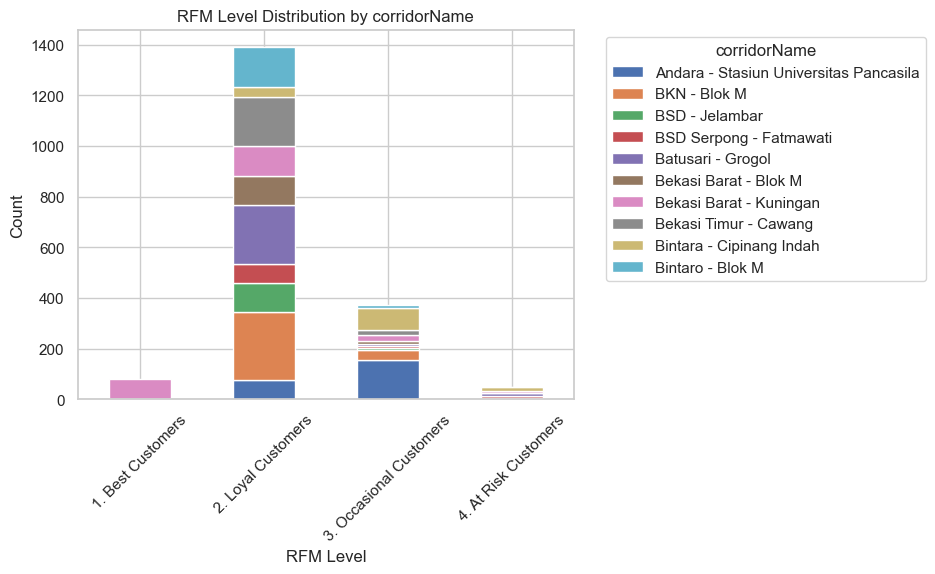

In [161]:
contingency_table = pd.crosstab(df['rfm_level'], df['corridorName'])

# Lakukan uji Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Tampilkan hasil uji Chi-square
print("\nHasil Uji Chi-square:")
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print("\nAda hubungan yang signifikan antara RFM level dan preferensi koridor (tolak H0).")
else:
    print("\nTidak ada hubungan yang signifikan antara RFM level dan preferensi koridor (gagal tolak H0).")

# Plotting the crosstab data
contingency_table.iloc[:,:10].plot(kind='bar', stacked=True)
plt.title('RFM Level Distribution by corridorName')
plt.xlabel('RFM Level')
plt.ylabel('Count')
plt.legend(title='corridorName', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

`Kartu`


Hasil Uji Chi-square:
Chi2: 347.78962069382885
p-value: 6.0900209652684984e-65
Degrees of freedom: 15

Ada hubungan yang signifikan antara RFM level dan preferensi Bank (tolak H0).


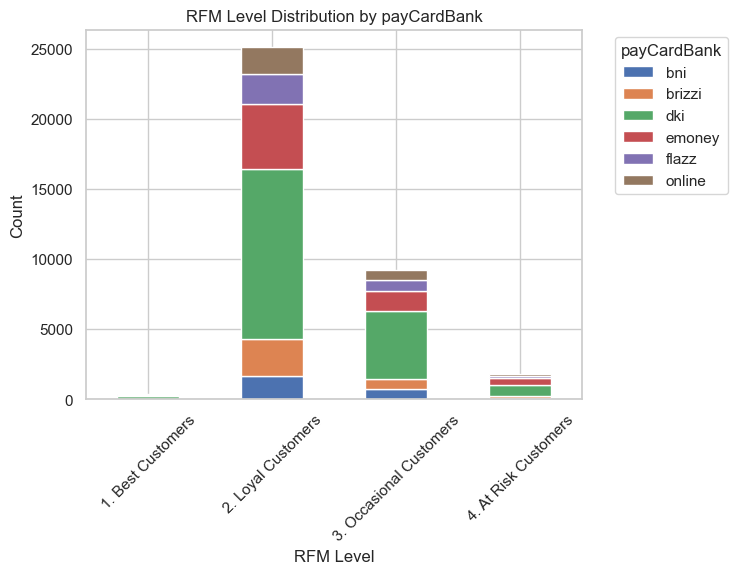

In [162]:
contingency_table = pd.crosstab(df['rfm_level'], df['payCardBank'])

# Lakukan uji Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Tampilkan hasil uji Chi-square
print("\nHasil Uji Chi-square:")
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print("\nAda hubungan yang signifikan antara RFM level dan preferensi Bank (tolak H0).")
else:
    print("\nTidak ada hubungan yang signifikan antara RFM level dan preferensi bank (gagal tolak H0).")

# Plotting the crosstab data
contingency_table.iloc[:,:10].plot(kind='bar', stacked=True)
plt.title('RFM Level Distribution by payCardBank')
plt.xlabel('RFM Level')
plt.ylabel('Count')
plt.legend(title='payCardBank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

`payAmount`


Hasil Uji Chi-square:
Chi2: 12330.948952193583
p-value: 0.0
Degrees of freedom: 6

Ada hubungan yang signifikan antara RFM level dan preferensi tarif (tolak H0).


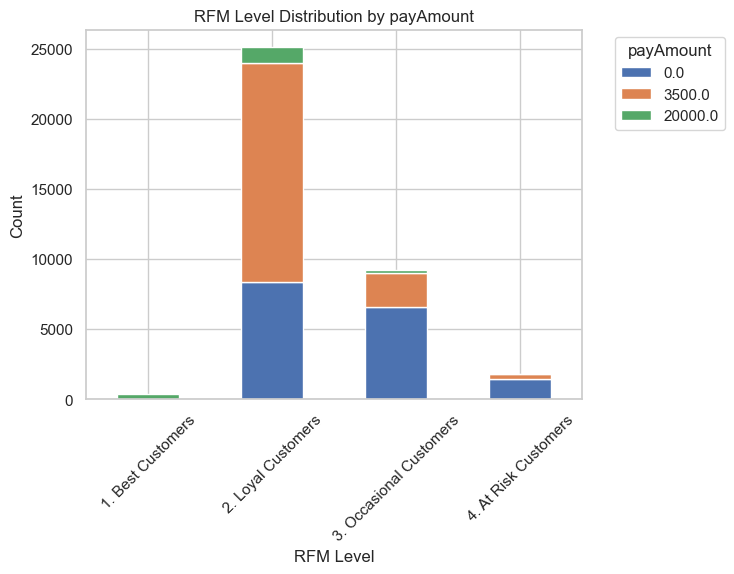

In [163]:
contingency_table = pd.crosstab(df['rfm_level'], df['payAmount'])

# Lakukan uji Chi-square
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Tampilkan hasil uji Chi-square
print("\nHasil Uji Chi-square:")
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")

# Interpretasi hasil
alpha = 0.05
if p < alpha:
    print("\nAda hubungan yang signifikan antara RFM level dan preferensi tarif (tolak H0).")
else:
    print("\nTidak ada hubungan yang signifikan antara RFM level dan preferensi tarif (gagal tolak H0).")

# Plotting the crosstab data
contingency_table.iloc[:,:10].plot(kind='bar', stacked=True)
plt.title('RFM Level Distribution by payAmount')
plt.xlabel('RFM Level')
plt.ylabel('Count')
plt.legend(title='payAmount', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

## __7. Conclusion and Recomendation__
___


__Kesimpulan__

Berdasarkan analisis yang telah dilakukan kesimpulan akan dibagi menjadi 2, yaitu mengenai karakteristik pelanggan Transjakarta selama April 2023 dan pola penggunaan Transjakarta selama sebulan terakhir ini.

`Karakteristik pelanggan` 
1. Pada bulan April 2023, pelanggan dengan frequensi perjalanan rendah (1-4 kali dalam sebulan) mendominasi penggunaan Transjakarta. Faktor yang dapat mempengaruhi hal ini, yaitu karena meningkatnya arus mudik yang menyebabkan preferensi kendaraan berubah. Pada masa ini penggunaan Transjakarta dapat menjadi opsi transportasi umum untuk perki ke terminal atau stasiun karena biaya yang efisien dan dapat menghindari kemacetan.
2. Berdasarkan RFM Level, pelanggan yang mendominasi adalah "Loyal Customer", yaitu kelompok yang setia manggunakan Transjakarta dan berkontribusi atas pendapatan Transjakarta.
3. Proporsi gender dalam kategori "Loyal Customers" hampir setara, tetapi secara keseluruhan, pelanggan wanita lebih mendominasi penggunaan TransJakarta.
4. Rentang umur pengguna 11-77 tahun dengan rata rata umur 32,87 tahun. Kelompok umur dewasa muda hingga dewasa (30-an) adalah pengguna paling aktif. Kelompok umur di atas 70 tahun paling sedikit menggunakan TransJakarta, menunjukkan kebutuhan untuk pendekatan khusus jika ingin melibatkan kelompok usia ini.
5. Kartu Bank DKI dominan di semua segmen RFM, menunjukkan preferensi yang kuat terhadap kartu ini.
6. Umur, jenis kelamin, dan level RFM dapat berhubungan dengan preferensi pemilihan koridor, dan bank. Berdasarkan data dari analisis ini, dapat dilakukan evaluasi pelayanan pada tiap koridor agar disesuaikan dengan karakteristik penumpang yang ada. Misalnya, koridor yang menjadi preferensi lansia harus mempersiapkan fasilitas khusus yang mendukung kenyamanan pelanggan.

__Rekomendasi berdasarkan karakteristik pelanggan__
1. Berdasarkan hasil analisis, dapat disimpulkan bahwa Transjakarta diminati oleh berbagai kelompok usia. Namun, penggunaannya didominasi oleh kelompok produktif yang aktif pada hari kerja. Sementara, penggunaan Transjakarta di akhir pekan belum efektif. Hal ini dapat menjadi evaluasi untuk meningkatkan pelayanan agar Transjakarta dapat menarik perhatian masyarakat yang jarang menggunakan Transjakarta di akhir pekan. 
2. Penggunaan Transjakarta didominasi oleh perempuan sehingga ini dapat menjadi bahan evaluasi dan monitoring fasilitas khusus perempuan, seperti ibu hami, anak-anak, dan keamanan lainnya.
3. Luasnya kelompok usia pengguna Transjakarta perlu menjadi kunci utama pengembangan fasilitas agar nyaman untuk eluruh kalangan usia. Misalnya membuat halte yang ramah anak/remaja, lansia, dan menyediakan layanan informasi yang tanggap untuk menciptakan suasana aman dalam melakukan perjalanan.

`Pola Aktivitas Transportasi`
1. Terjadi peningkatan aktivitas di koridor Kalideres - Budaran HI via Veteran selama periode arus mudik.
2. Koridor Cibubur - Balai Kota (1T) adalah koridor yang paling banyak digunakan pada hari kerja.
2. Terdapat koridor yang memiliki efisiensi yang rendah, yaitu rute yang singkat dengan durasi perjalanan yang lama. 
4. Terdapat koridor yang hanya memiliki pelanggan untuk rute satu arah saja, misalnya hanya rute kembali atau pergi. Hal ini perlu analisis lebih lanjut berkaitan dengan efisiensi menyediaan kendaraan di rute-rute tertentu.
3. Halte dengan kepadatan tinggi biasanya terletak di daerah pinggir Jakarta, seperti Bekasi. Namun halte yang populer dan memiliki transaksi tinggi terletak di area perkantoran Jakarta.
4. Puncak waktu tapIn terjadi pada pk 06.00 dan 17.00,s sedangkan tapOut pada pk 7.00 dan 18.00.
5. Aktivitas terendah antara pk 10.00 hingga 16.00.
6. Aktivitas transaksi cenderung menurun pada hari Sabtu dan Minggu, sementara tinggi pada hari Senin hingga Jumat.
7. Puncak frekuensi transaksi terjadi pada 13-14 April dan 17-19 April dikarenakan mulainya libur lebaran dan arus mudik.
8. Rata-rata pendapatan menurun pada 29 April, di hari libur lebaran


__Rekomendasi__
1. Perlu dilakukan evaluasi dan optimalisasi koridor, dengan memfokuskannya pada koridor-koridor dengan durasi perjalanan yang panjanng. Misalnya dengan menangani rute yang kurang efektif atau menambahkan jumlah bus yang menangani koridor tertentu untuk mengurangi kepadatan.
2. Pada periode puncak seperti, hari libur Lebaran, dapat dilakukan meningkatan kapasitas kendaraan dan lonjakan penumpang. Hal ini juga dapat dilakukan untuk menangani jam-jam sibuk pada hari Senin-Jumat.
